# Imports

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

from scipy import stats

from datetime import datetime

from statsmodels import robust

# Read CSV and Explore

In [4]:
df = pd.read_csv('dataset.csv')

In [5]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [6]:
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [7]:
acc_mag = np.sqrt(df.acceleration_x**2 + df.acceleration_y**2 + df.acceleration_z**2)

In [8]:
df['acceleration_mag'] = acc_mag

In [9]:
df['acceleration_mag'].to_csv('run_walk_mag.csv', header=True, index_label='index')

## Separate Data by Wrist

In [239]:
SENSOR_DATA_COLUMNS = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']

# populate dataframe with 'left' wrist only
df_left_wrist_data = pd.DataFrame()
df_left_wrist_data = df[df.wrist == 0]

# populate dataframe with 'right' wrist only
df_right_wrist_data = pd.DataFrame()
df_right_wrist_data = df[df.wrist == 1]

## Separate Data by Activity

In [13]:
# dataframe with 'walk' data only
df_walk_data = pd.DataFrame()
df_walk_data = df[(df.activity == 0)]

# dataframe with 'run' data only 
df_run_data = pd.DataFrame()
df_run_data = df[(df.activity == 1)]

# dataframes with 'run' and 'left' or 'right' wrist data
df_run_left_data = pd.DataFrame()
df_run_right_data = pd.DataFrame()
df_run_left_data = df_run_data[(df_run_data.wrist == 0)]
df_run_right_data = df_run_data[(df_run_data.wrist == 1)]

# dataframes with 'walk' and 'left' or 'right' wrist data
df_walk_left_data = pd.DataFrame()
df_walk_right_data = pd.DataFrame()
df_walk_left_data = df_walk_data[(df_walk_data.wrist == 0)]
df_walk_right_data = df_walk_data[(df_walk_data.wrist == 1)]

In [14]:
df_walk_data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,acceleration_mag
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0.825148
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,1.329887
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,1.547307
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,0.871729
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,1.048889
5,2017-6-30,13:51:17:46806991,viktor,0,0,0.4044,-0.8056,-0.0956,0.6925,-0.2179,2.5750,0.906460
6,2017-6-30,13:51:17:246767997,viktor,0,0,0.6320,-1.1290,-0.2982,0.0548,-0.1896,0.4473,1.327776
7,2017-6-30,13:51:17:446569025,viktor,0,0,0.6670,-1.3503,-0.0880,-0.8094,-0.7938,-1.4348,1.508623
8,2017-6-30,13:51:17:646152973,viktor,0,0,0.2704,-0.8633,0.1293,-0.4173,-0.1904,-2.6759,0.913850
9,2017-6-30,13:51:17:846502006,viktor,0,0,0.4690,-1.0740,0.0219,0.0388,1.1491,1.6982,1.172142


## Check Evenness of Wrist and Activity Observations

In [241]:
print('Running observations: ' + str(len(df_run_data)))
print('   Running with left wrist observations: ' + str(len(df_run_left_data)))
print('   Running with right wrist observations: ' + str(len(df_run_right_data)))
print('\n')
print('Walking observations: ' + str(len(df_walk_data)))
print('   Walking with left wrist observations: ' + str(len(df_walk_left_data)))
print('   Walking with right wrist observations: ' + str(len(df_walk_right_data)))

Running observations: 44365
   Running with left wrist observations: 23708
   Running with right wrist observations: 20657


Walking observations: 44223
   Walking with left wrist observations: 18622
   Walking with right wrist observations: 25601


In [242]:
print('The number of right wrist data points is: ' + str(len(df_right_wrist_data)))
print('The number of left wrist data points is: ' + str(len(df_left_wrist_data)))

The number of right wrist data points is: 46258
The number of left wrist data points is: 42330


## Plot Distributions of Wrist and Activity Observations

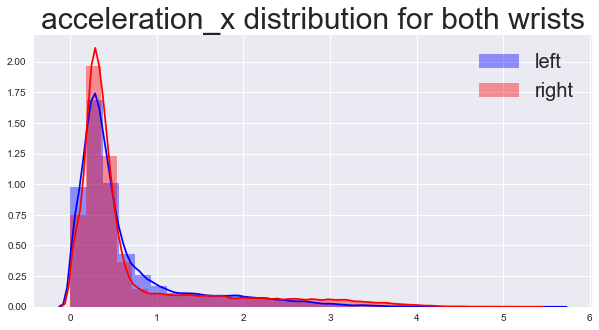

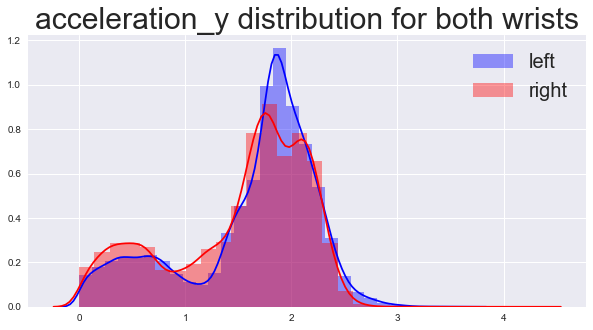

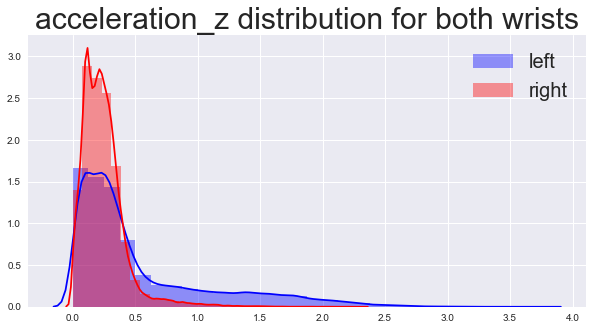

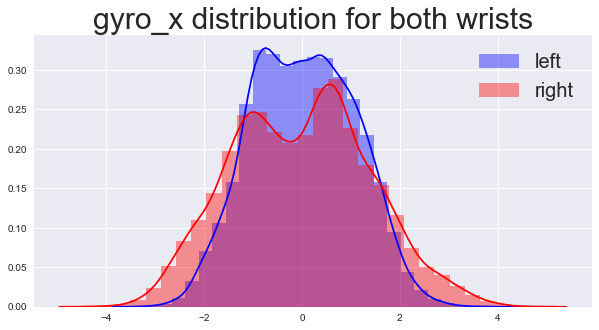

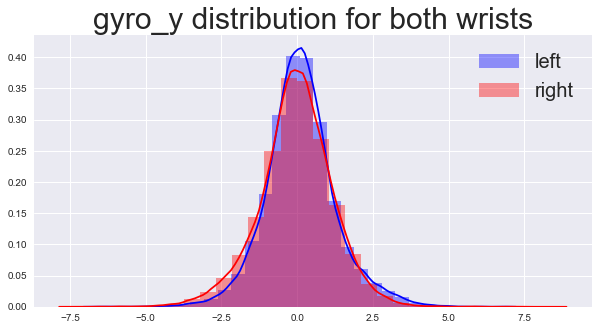

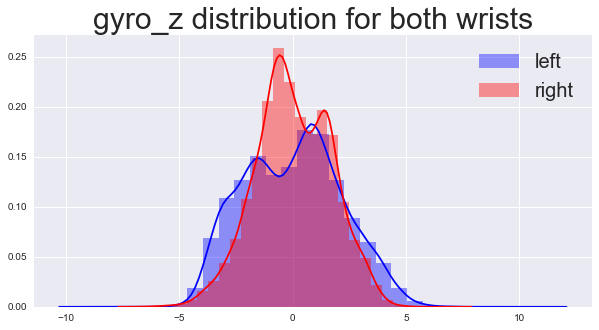

In [810]:
for c in SENSOR_DATA_COLUMNS:
    plt.figure(figsize=(10,5))
    plt.title("%s distribution for both wrists" %c, fontsize=30)
    sns.distplot(df_left_wrist_data[c], label='left', color='b', bins=30)
    sns.distplot(df_right_wrist_data[c], label='right', color='r', bins=30)
    plt.legend(fontsize=20)
    plt.xlabel("", fontsize=18)
    plt.show()
    
# Confirms that wrist placement does not have an effect and can be ignored
# Also shows that x- and z-acceleration data are skewed right

In [220]:
# Account for gravity in y-direction and eliminate negatives
df['acceleration_x'] = np.absolute(df.acceleration_x)
df['acceleration_y'] = np.absolute(df.acceleration_y-1)
df['acceleration_z'] = np.absolute(df.acceleration_z)

## Plot Activity by Date

date
2017-6-30    Axes(0.125,0.125;0.775x0.755)
2017-7-1     Axes(0.125,0.125;0.775x0.755)
2017-7-10    Axes(0.125,0.125;0.775x0.755)
2017-7-11    Axes(0.125,0.125;0.775x0.755)
2017-7-15    Axes(0.125,0.125;0.775x0.755)
2017-7-16    Axes(0.125,0.125;0.775x0.755)
2017-7-17    Axes(0.125,0.125;0.775x0.755)
2017-7-2     Axes(0.125,0.125;0.775x0.755)
2017-7-4     Axes(0.125,0.125;0.775x0.755)
2017-7-6     Axes(0.125,0.125;0.775x0.755)
2017-7-7     Axes(0.125,0.125;0.775x0.755)
2017-7-9     Axes(0.125,0.125;0.775x0.755)
dtype: object

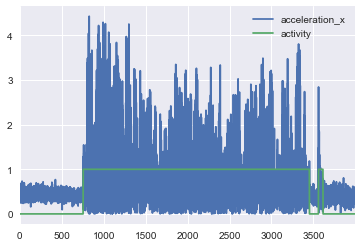

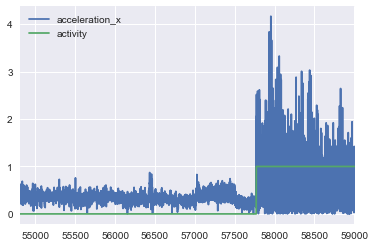

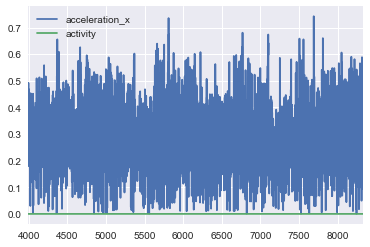

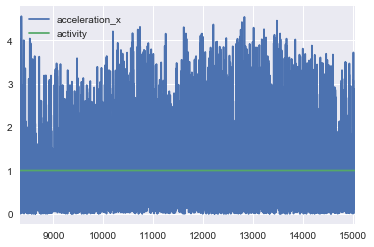

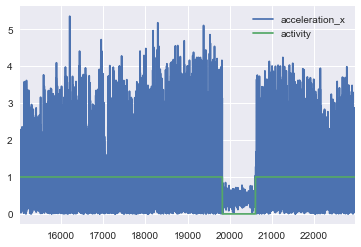

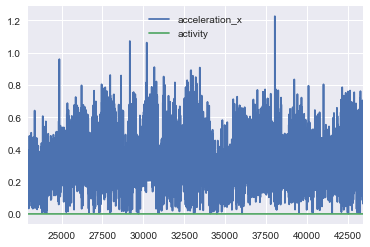

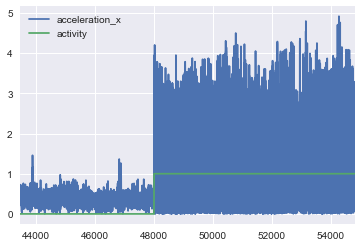

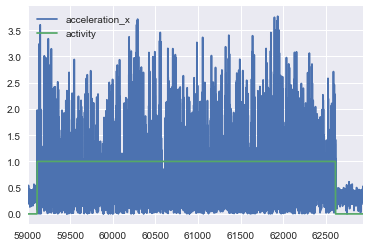

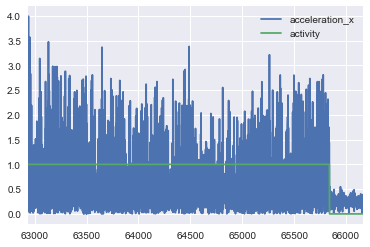

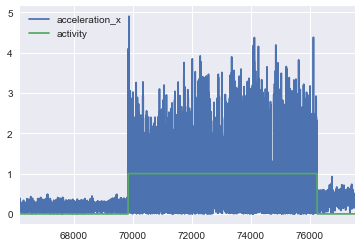

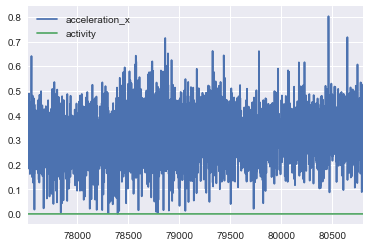

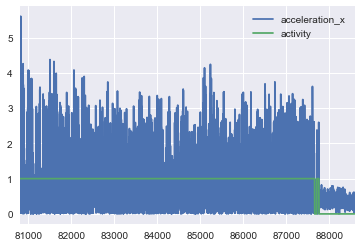

In [223]:
df.groupby('date').plot(y=['acceleration_x','activity'])

## Create Different Datetime Columns

### Full datetime of activity column

In [232]:
day = []

for index, row in df.iterrows():
    old_datetime = row.date + ':' + row.time[:-3]
    new_datetime = datetime.strptime(old_datetime, '%Y-%m-%d:%H:%M:%S:%f')
    day.append(new_datetime)

In [234]:
df['date_time'] = day

In [244]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,date_time,time_sec
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,1.7814,0.0076,-0.0590,0.0325,-2.9296,2017-06-30 13:51:15.847724,49875
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,2.1233,0.2344,-0.1757,0.0208,0.1269,2017-06-30 13:51:16.246945,49876
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,2.4817,0.0722,-0.9105,0.1063,-2.4367,2017-06-30 13:51:16.446233,49876
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,1.8125,0.0888,0.1199,-0.4099,-2.9336,2017-06-30 13:51:16.646117,49876
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,1.9312,0.0359,0.0527,0.4379,2.4922,2017-06-30 13:51:16.846738,49876


### Seconds

In [236]:
time_sec = []

for index, row in df.iterrows():
    old_time = row.time[:-3]
    new_time_extended = datetime.strptime(old_time, '%H:%M:%S:%f')
    new_time = 60*60*new_time_extended.hour + 60*new_time_extended.minute + new_time_extended.second
    time_sec.append(new_time)

In [237]:
df['time_sec'] = time_sec

In [175]:
all_walk = df[df.date=='2017-7-10'].reset_index()

In [176]:
all_run = df[df.date=='2017-7-11'].reset_index()

# Collect Data Metrics and Resample

## Metric Sampling Function

In [913]:
def data_metrics(acc, window):
    metric_dict = {}
    mn_list = []
    std_list = []
    med_list = []
    ma_list = []
    mi_list = []
    ent_list = []
    mad_list = []

    for i in range(0,len(acc), 1):
        mn_list.append(np.mean(acc[i:i+window]))
        std_list.append(np.std(acc[i:i+window]))
        med_list.append(np.median(acc[i:i+window]))
        ma_list.append(np.max(acc[i:i+window]))
        mi_list.append(np.min(acc[i:i+window]))
        ent_list.append(stats.entropy(acc[i:i+window]))
        mad_list.append(robust.mad(acc[i:i+window]))
    
    metric_dict['mn'] = mn_list
    metric_dict['std'] = std_list
    metric_dict['med'] = med_list
    metric_dict['ma'] = ma_list
    metric_dict['mi'] = mi_list
    metric_dict['ent'] = ent_list
    metric_dict['mad'] = mad_list

    return metric_dict

## Metrics for Run vs Walk Magnitude of Accelerations

In [489]:
# Run vs. Walk Magnitude of Accelerations
dm_run_mag = data_metrics(run_mag) # win = 5
dm_walk_mag = data_metrics(walk_mag) # win = 5
all_metrics = ['mn', 'std','med','ma','mi','ent','mad']

In [914]:
dm_run_mag2 = data_metrics(df_run_data.acceleration_mag, 5)
dm_walk_mag2 = data_metrics(df_walk_data.acceleration_mag, 5)

In [917]:
len(dm_run_mag2['mn']), len(df_run_data),len(dm_walk_mag2['mn']),len(df_walk_data)

(44365, 44365, 44223, 44223)

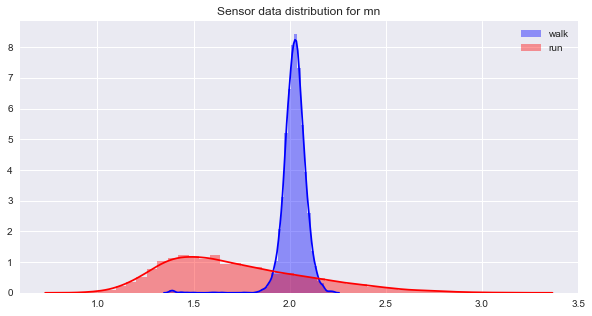

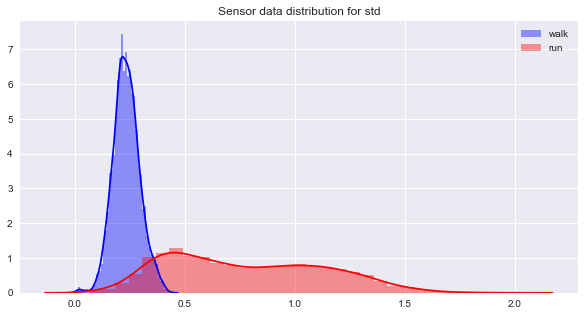

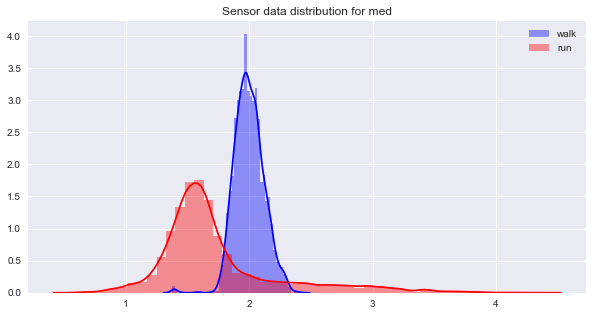

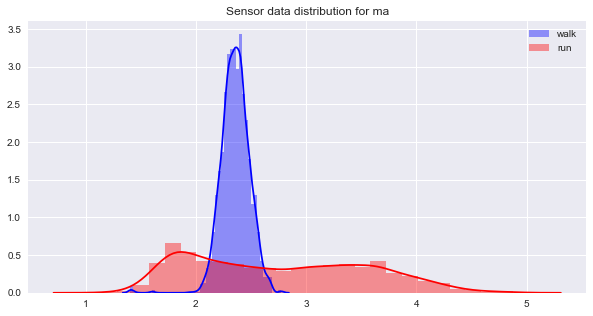

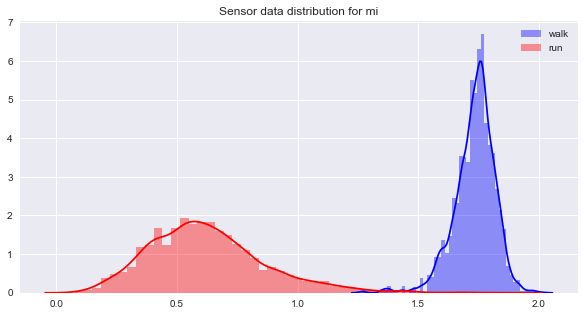

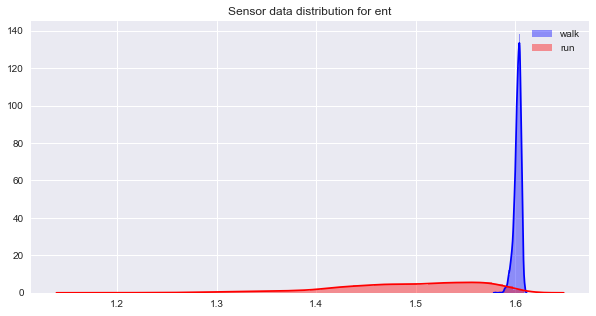

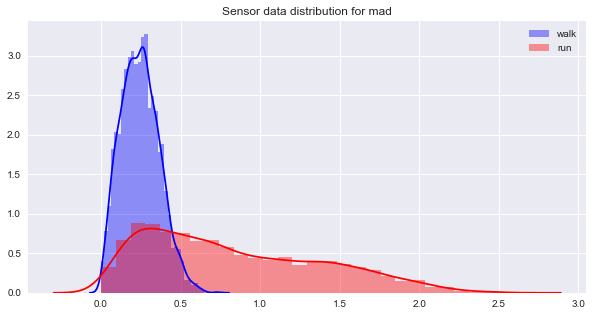

In [490]:
# Run vs. Walk Magnitude of Accelerations
for m in all_metrics:
    plt.figure(figsize=(10,5))
    plt.title("Sensor data distribution for %s" % m)
    sns.distplot(dm_walk_mag[m], label='walk', color='b')
    sns.distplot(dm_run_mag[m], label='run', color='r')
    plt.legend()
    plt.show()


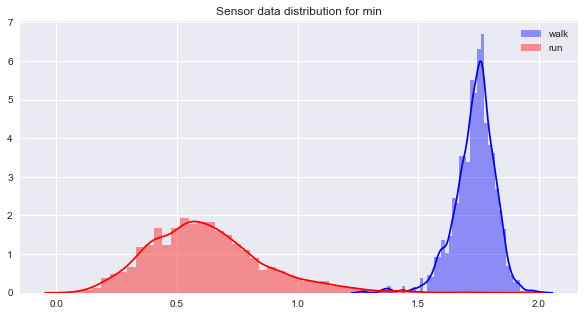

In [762]:
plt.figure(figsize=(10,5))
plt.title("Sensor data distribution for %s" % 'min')
f = sns.distplot(dm_walk_mag['mi'], label='walk', color='b')
sns.distplot(dm_run_mag['mi'], label='run', color='r')
plt.legend()
plt.show()

In [ ]:
# Run vs. Walk Magnitude of Accelerations
dm_run_mag_800 = data_metrics(run_mag, 800) # win = 800
dm_walk_mag_800 = data_metrics(walk_mag, 800) # win = 800

In [769]:
stats.describe(dm_run_mag_800['mi']), stats.describe(dm_walk_mag_800['mi'])

(DescribeResult(nobs=5896, minmax=(0.076646917746247309, 0.24246094530872389), mean=0.15860780284043258, variance=0.0024989705634363515, skewness=0.07863917730395706, kurtosis=-0.9150126320050673),
 DescribeResult(nobs=3537, minmax=(1.2681757015492767, 1.5070177603465724), mean=1.3949785828845453, variance=0.0043110997253531661, skewness=-0.2651391000302183, kurtosis=-0.5824792773599392))

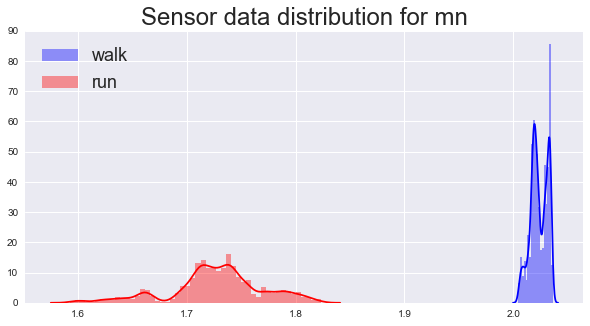

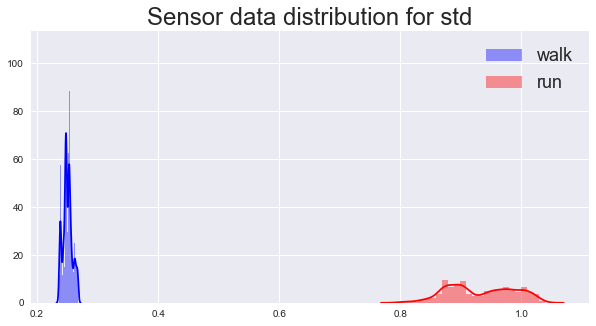

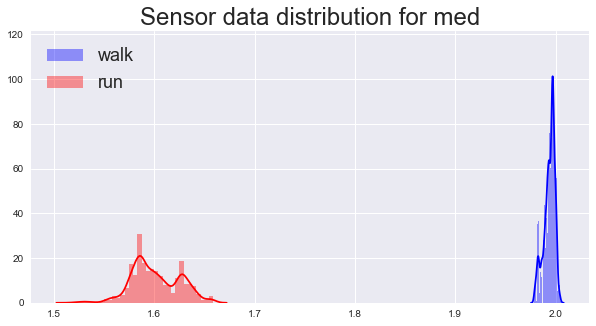

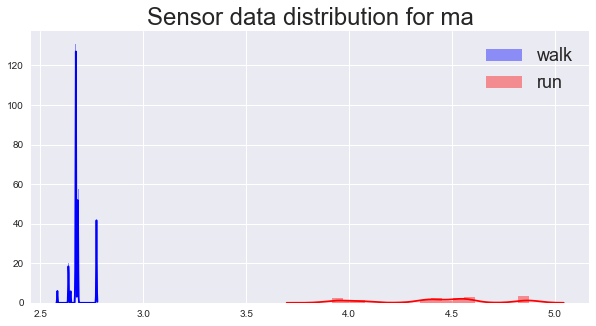

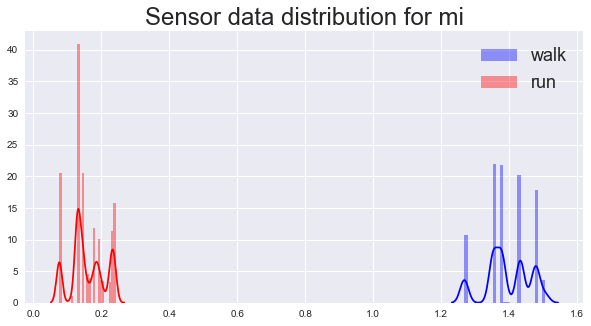

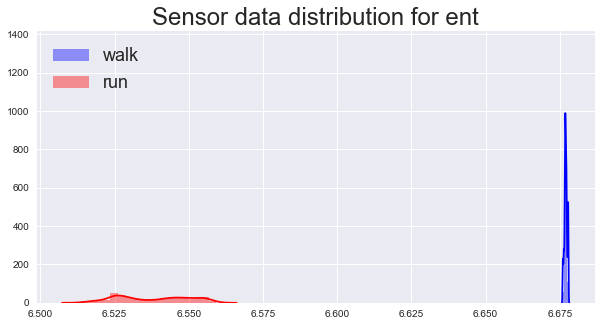

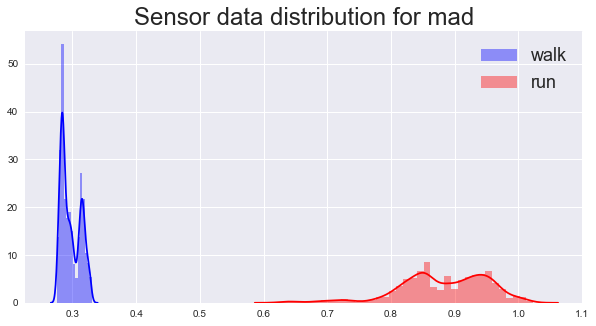

In [862]:
# Run vs. Walk Magnitude of Accelerations
for m in all_metrics:
    plt.figure(figsize=(10,5))
    plt.title("Sensor data distribution for %s" % m, fontsize=24)
    sns.distplot(dm_walk_mag_800[m], label='walk', color='b')
    sns.distplot(dm_run_mag_800[m], label='run', color='r')
    plt.legend(fontsize=18)
    plt.show()

In [631]:
len(dm_run_mag['mn']), len(dm_walk_mag['mn'])

(6691, 4332)

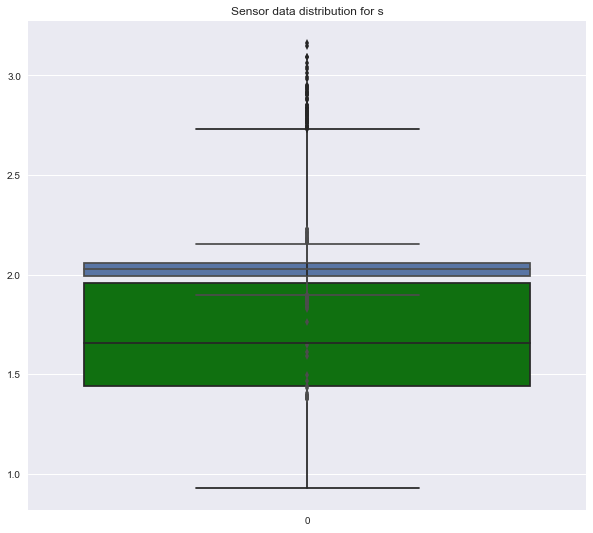

In [637]:
# Run vs. Walk Magnitude of Accelerations
# for m in all_metrics:
plt.figure(figsize=(10,9))
plt.title("Sensor data distribution for s")
sns.boxplot(y = dm_run_mag['mn'], x=[5]*len(dm_run_mag['mn']), color='g') # dm_run_mag_800['mn']], 
sns.boxplot(y = dm_walk_mag['mn'], x=[0]*len(dm_walk_mag['mn']))
# plt.legend()
plt.show()

## Metrics for Run vs Walk Individual Accelerations

In [928]:
# Run Vs Walk Individual Accelerations
dm_run_acc_x = data_metrics(df_run_data['acceleration_x'], 5)
dm_run_acc_y = data_metrics(df_run_data['acceleration_y'], 5)
dm_run_acc_z = data_metrics(df_run_data['acceleration_z'], 5)

dm_walk_acc_x = data_metrics(df_walk_data['acceleration_x'], 5)
dm_walk_acc_y = data_metrics(df_walk_data['acceleration_y'], 5)
dm_walk_acc_z = data_metrics(df_walk_data['acceleration_z'], 5)

In [931]:
len(dm_walk_acc_x['mn']), len(df_walk_data)

(44223, 44223)

In [492]:
# Run Vs Walk Individual Accelerations
metrics = ['ent', 'mad', 'std']
accels = ['acceleration_x', 'acceleration_y', 'acceleration_z']
sens_run = [dm_run_acc_x, dm_run_acc_y, dm_run_acc_z]
sens_walk = [dm_walk_acc_x, dm_walk_acc_y, dm_walk_acc_z]

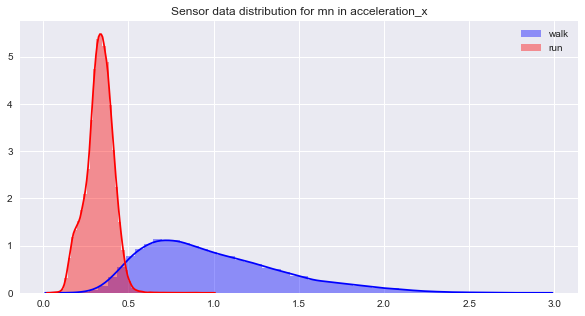

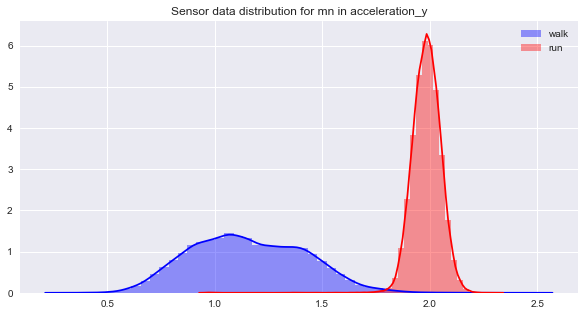

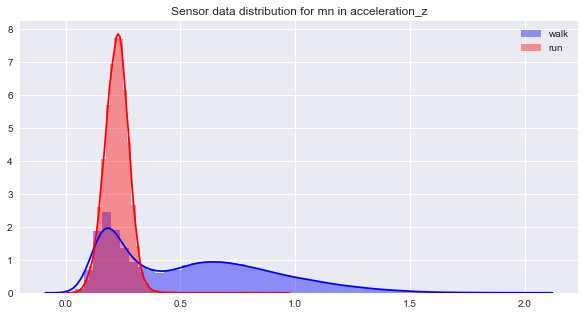

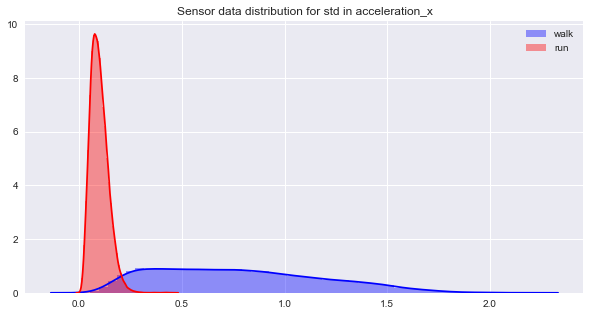

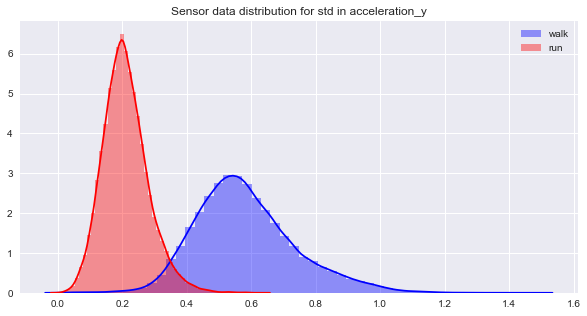

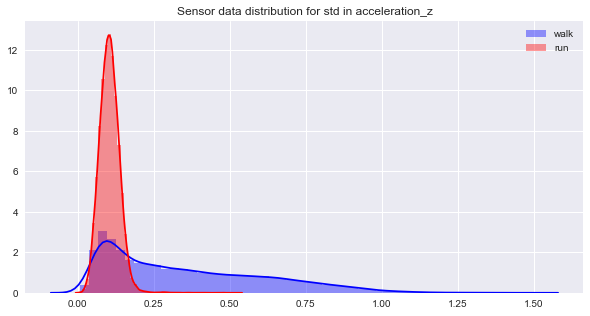

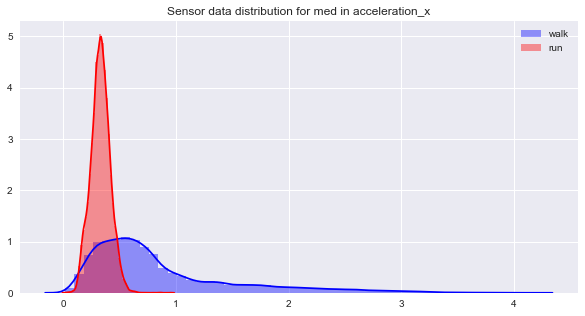

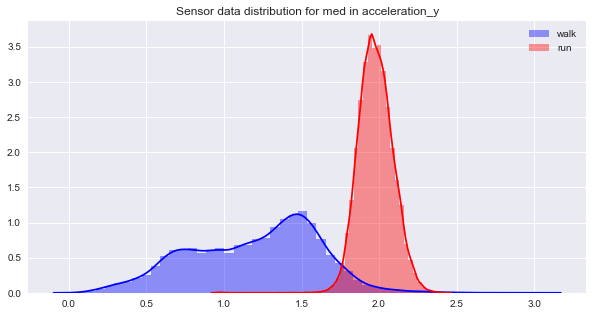

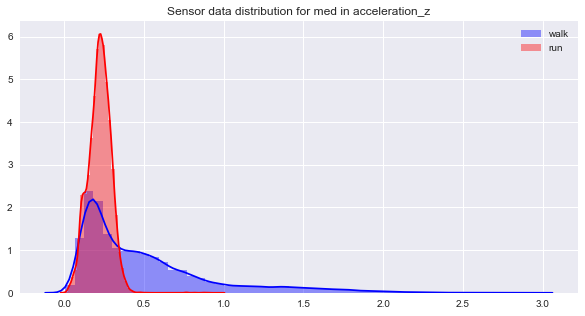

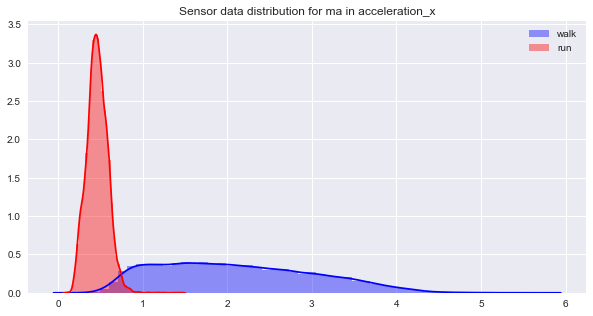

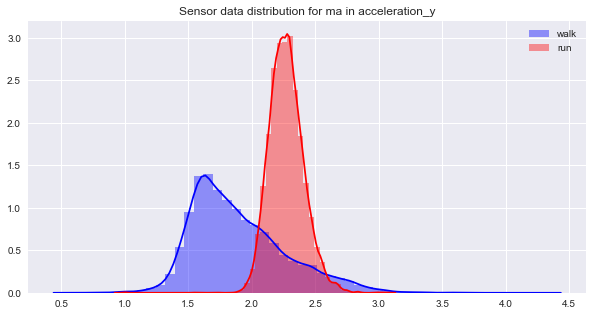

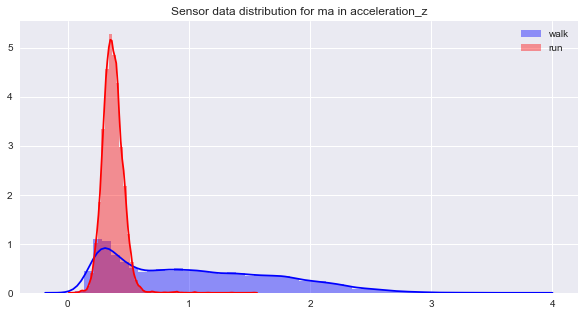

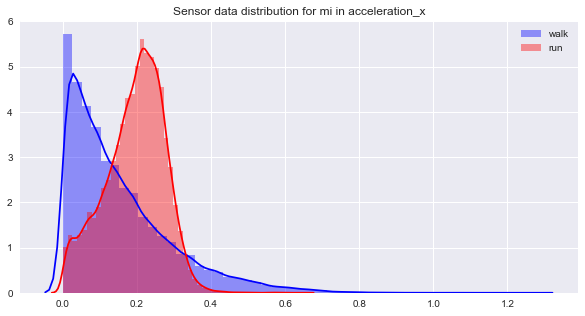

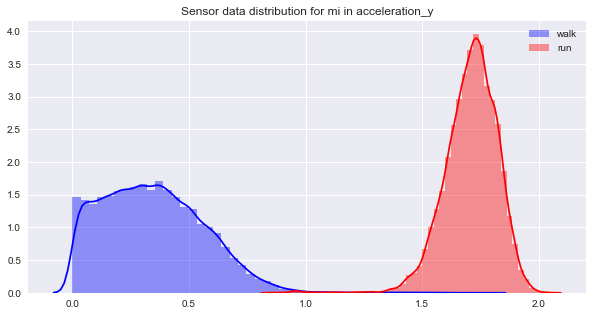

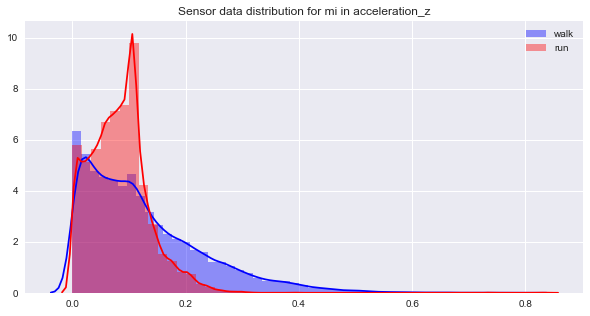

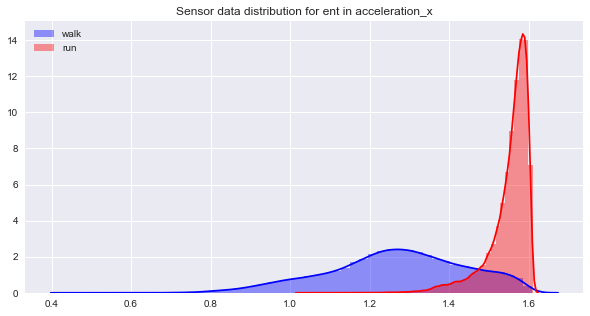

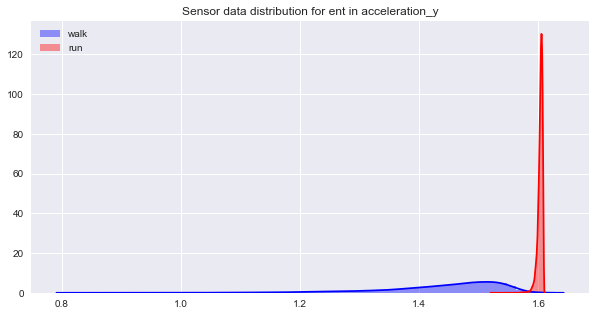

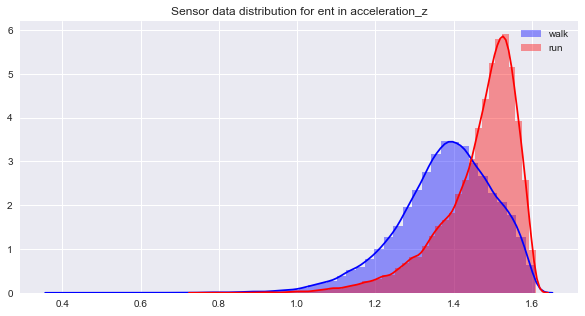

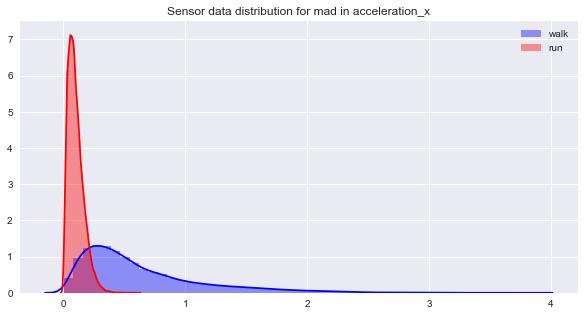

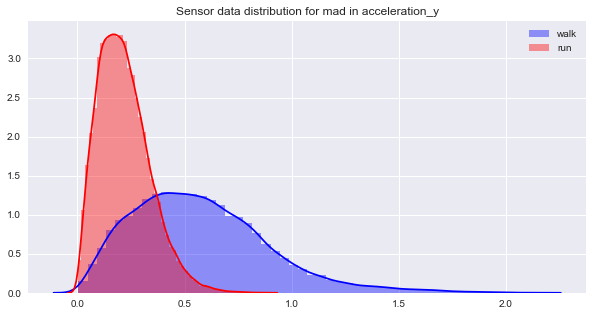

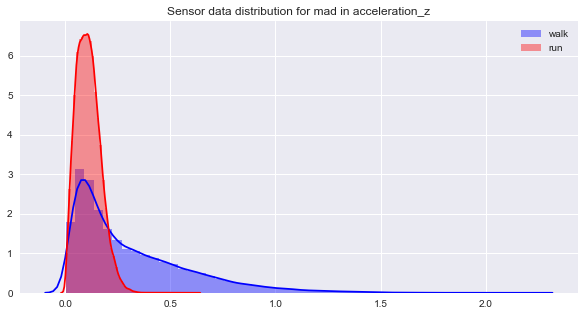

In [494]:
for m in all_metrics:
    for s in range(3):
        plt.figure(figsize=(10,5))
        plt.title("Sensor data distribution for %s in %s" %(m, accels[s]))
        sns.distplot(sens_run[s][m], label='walk', color='b')
        sns.distplot(sens_walk[s][m], label='run', color='r')
        plt.legend()
        plt.show()

## Metrics for Total Acceleration

In [13]:
dm_acc_x = data_metrics(df['acceleration_x'])
dm_acc_y = data_metrics(df['acceleration_y'])
dm_acc_z = data_metrics(df['acceleration_z'])

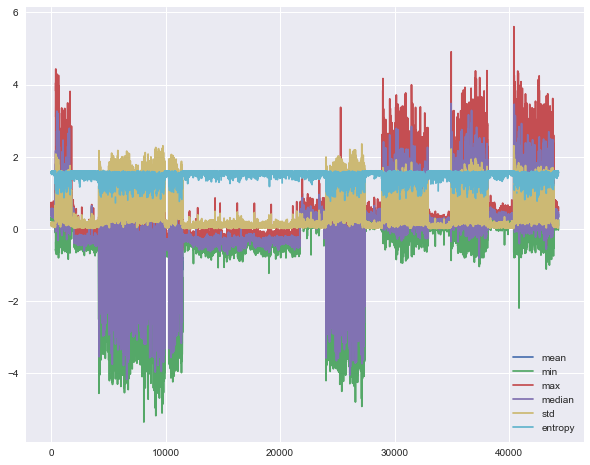

In [14]:
# Plot X-Acceleration
plt.figure(figsize=(10,8))
plt.plot(range(0,len(dm_acc_x['mn'])), dm_acc_x['mn'], label='mean')
plt.plot(range(0,len(dm_acc_x['mi'])), dm_acc_x['mi'], label='min')
plt.plot(range(0,len(dm_acc_x['ma'])), dm_acc_x['ma'], label='max')
plt.plot(range(0,len(dm_acc_x['med'])), dm_acc_x['med'], label='median')
plt.plot(range(0,len(dm_acc_x['std'])), dm_acc_x['std'], label='std')
plt.plot(range(0,len(dm_acc_x['ent'])), dm_acc_x['ent'], label='entropy')
plt.legend()

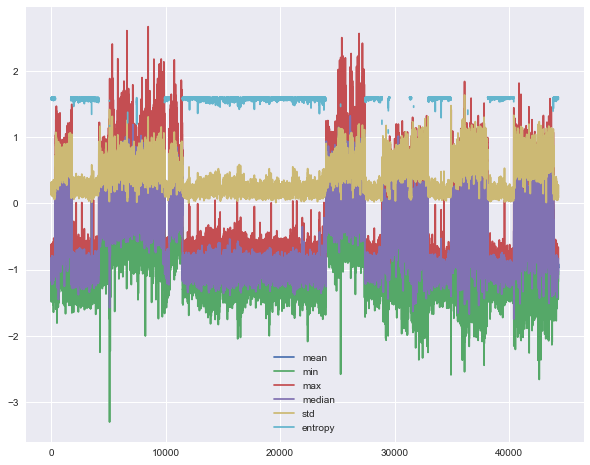

In [15]:
# Plot Y-Acceleration
plt.figure(figsize=(10,8))
plt.plot(range(0,len(dm_acc_y['mn'])), dm_acc_y['mn'], label='mean')
plt.plot(range(0,len(dm_acc_y['mi'])), dm_acc_y['mi'], label='min')
plt.plot(range(0,len(dm_acc_y['ma'])), dm_acc_y['ma'], label='max')
plt.plot(range(0,len(dm_acc_y['med'])), dm_acc_y['med'], label='median')
plt.plot(range(0,len(dm_acc_y['std'])), dm_acc_y['std'], label='std')
plt.plot(range(0,len(dm_acc_y['ent'])), dm_acc_y['ent'], label='entropy')
plt.legend()

## Metrics for Magnitude of Total Acceleration

In [576]:
dm_acc_mag = data_metrics(df['acceleration_mag'])

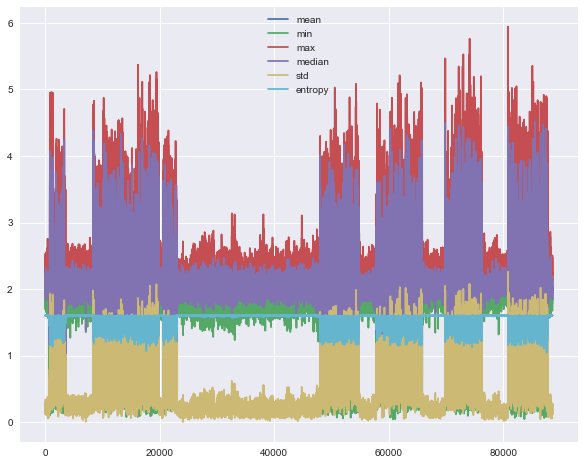

In [577]:
# Plot Magnitude of Acceleration
plt.figure(figsize=(10,8))
plt.plot(range(0,len(dm_acc_mag['mn'])), dm_acc_mag['mn'], label='mean')
plt.plot(range(0,len(dm_acc_mag['mi'])), dm_acc_mag['mi'], label='min')
plt.plot(range(0,len(dm_acc_mag['ma'])), dm_acc_mag['ma'], label='max')
plt.plot(range(0,len(dm_acc_mag['med'])), dm_acc_mag['med'], label='median')
plt.plot(range(0,len(dm_acc_mag['std'])), dm_acc_mag['std'], label='std')
plt.plot(range(0,len(dm_acc_mag['ent'])), dm_acc_mag['ent'], label='entropy')
plt.legend()

# Moving Window Average

## Average Functions

In [19]:
# moving window average I made
def moving_window_avg(series, win):
    mean_list = []
    length = len(series)
    window = win
    for i in range(0, length, 1):
        mean_list.append(np.mean(series[i:i+window]))
    return mean_list

def plot_moving_avg(avg_series, orig_series, win, label):
    orig_length = len(orig_series)
    avg_t = range(0, orig_length)
    orig_t = range(0, orig_length)

    plt.figure(figsize=(10,8));
    # Averaged
    plt.plot(avg_t, avg_series, c='r', label='averaged');
    # Original
    plt.plot(orig_t, orig_series, c='b', alpha=0.4, label='original');
    
    plt.plot();
    plt.legend();
    plt.title('Moving Window Average vs. Original of %s' % label);

# smooth moving window average from source
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.
    output:
        the smoothed signal    
    example:
    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    see also: 
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")
    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")
    if window_len<3:
        return x
    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")

    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

## Representative Walking and Running Days

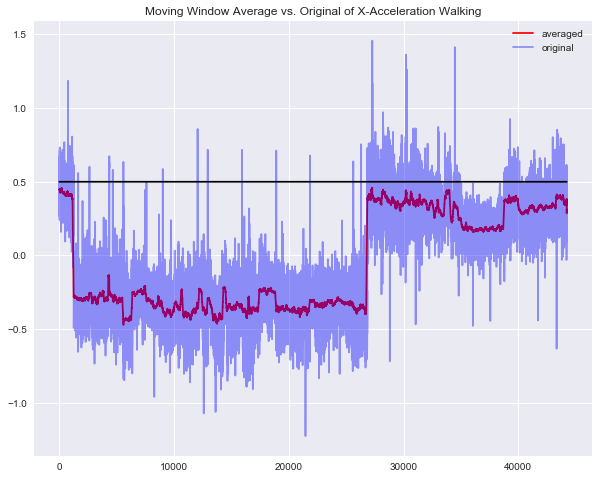

In [20]:
# All X Acceleration Moving Window Average
# Walking in Series and in absolute
win = 100
seriesx_w = (df_walk_data.acceleration_x)
meanx_w = moving_window_avg(seriesx_w, win)
# smooth_acc_x = smooth(seriesx,win,window='hamming')

threshold = 0.5
plot_moving_avg(meanx_w, seriesx_w, win, 'X-Acceleration Walking');
plt.plot(range(len(seriesx_w)), [threshold]*len(seriesx_w), c='k');

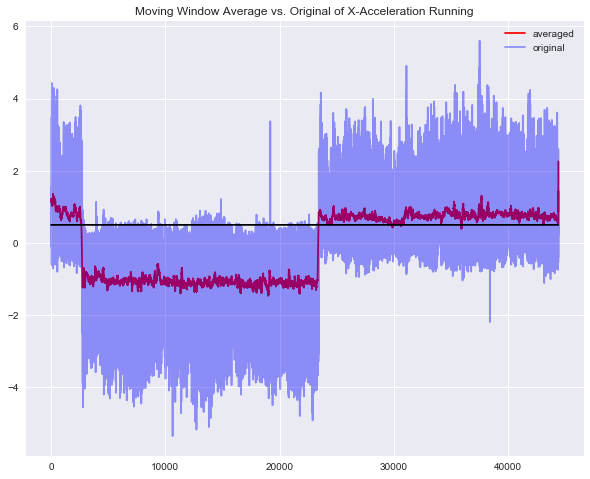

In [21]:
# All X Acceleration Moving Window Average
# Running in Series and in absolute
win = 100
seriesx_r = (df_run_data.acceleration_x)
meanx_r = moving_window_avg(seriesx_r, win)
# smooth_acc_x = smooth(seriesx,win,window='hamming')

threshold = 0.5
plot_moving_avg(meanx_r, seriesx_r, win, 'X-Acceleration Running');
plt.plot(range(len(seriesx_r)), [threshold]*len(seriesx_r), c='k');

In [23]:
np.mean(df_walk_data.groupby('time').count())

date                1.0
username            1.0
wrist               1.0
activity            1.0
acceleration_x      1.0
acceleration_y      1.0
acceleration_z      1.0
gyro_x              1.0
gyro_y              1.0
gyro_z              1.0
acceleration_mag    1.0
dtype: float64

## Acceleration Moving Average

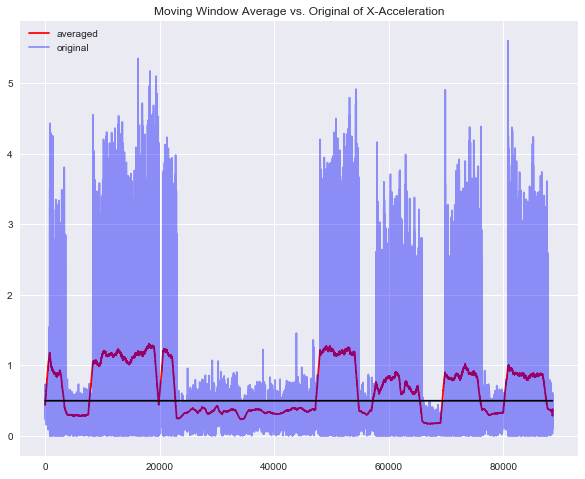

In [165]:
# All X Acceleration Moving Window Average
# Running and Walking in Series and in absolute
win = 800
seriesx = np.absolute(df.acceleration_x)
mean_acc_x = moving_window_avg(seriesx, win)
# smooth_acc_x = smooth(seriesx,win,window='hamming')

threshold = 0.5
plot_moving_avg(mean_acc_x, seriesx, win, 'X-Acceleration');
plt.plot(range(len(seriesx)), [threshold]*len(seriesx), c='k');

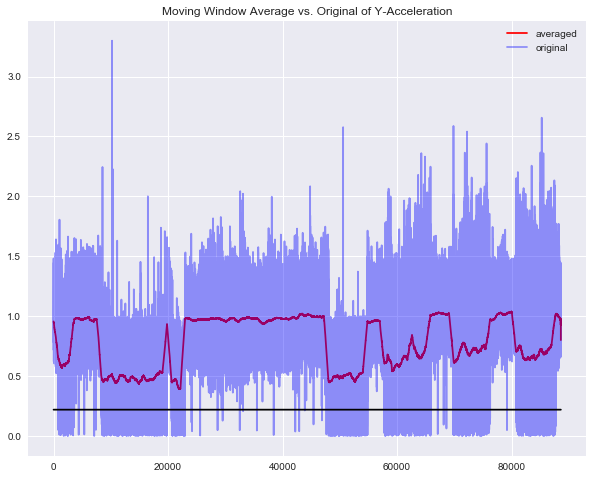

In [164]:
# All Y Acceleration Moving Window Average
# Running and Walking in Series and in absolute
win = 800
seriesy = np.absolute((df.acceleration_y)-1)
mean_acc_y = (moving_window_avg(seriesy, win))
# smooth_acc_x = smooth(series,win,window='hamming')

threshold = 0.22
plot_moving_avg(mean_acc_y, seriesy, win, 'Y-Acceleration');
plt.plot(range(len(seriesy)), [threshold]*len(seriesy), c='k');

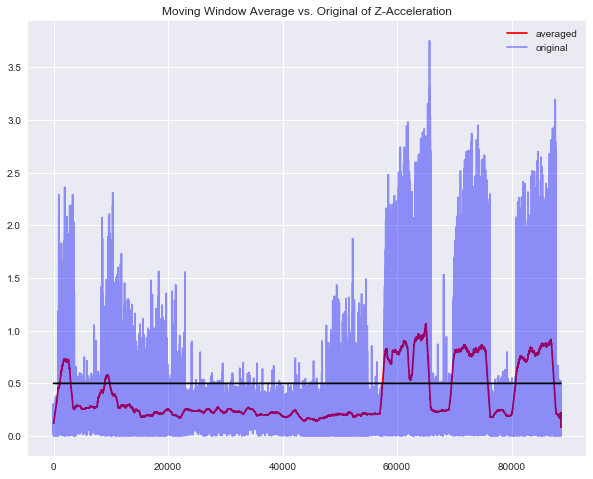

In [160]:
# All Z Acceleration Moving Window Average
# Running and Walking in Series and in absolute
win = 800
seriesz = np.absolute(df.acceleration_z)
mean_acc_z = moving_window_avg(seriesz, win)
# smooth_acc_x = smooth(series,win,window='hamming')

threshold = 0.5
plot_moving_avg(mean_acc_z, seriesz, win, 'Z-Acceleration');
plt.plot(range(len(seriesz)), [threshold]*len(seriesz), c='k');

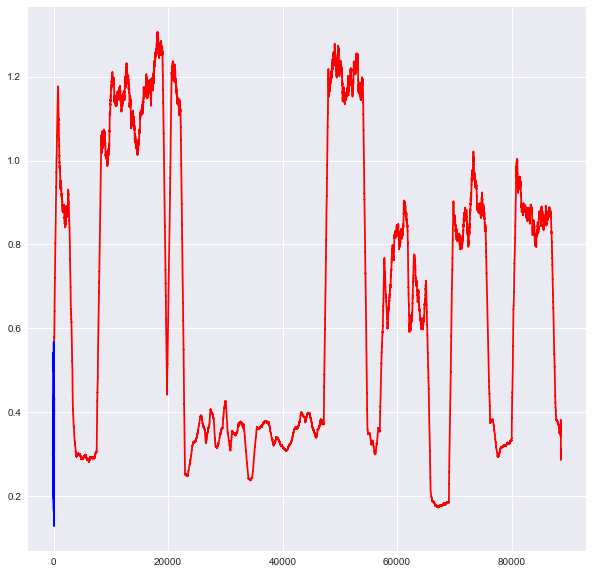

In [163]:
plt.figure(figsize=(10,10))
plt.plot(range(len(mean_acc_x)), mean_acc_x, 'r')
plt.plot(range(len(mean_acc_y)), mean_acc_y,'b')
# plt.plot(range(len(mean_acc_z)), mean_acc_z,'k')

## Magnitude of Acceleration Moving Averages

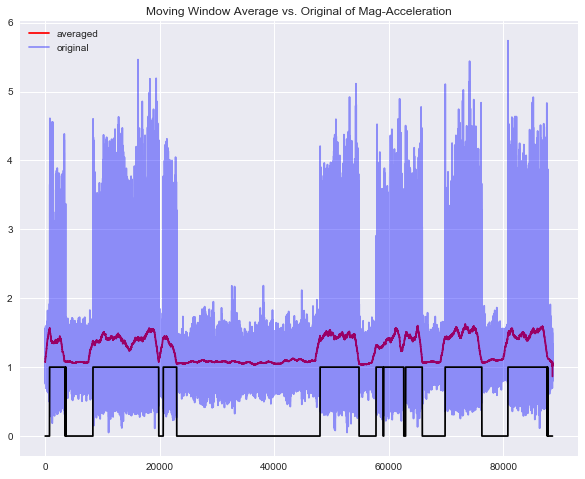

In [347]:
# Magnitude of Acceleration Moving Window Average
# Running and Walking in Series

win = 800
acc_mag = np.sqrt(df.acceleration_x**2 + (df.acceleration_y-1)**2 + df.acceleration_z**2)
mean_acc_mag = (moving_window_avg(acc_mag, win))

threshold = 0.22
plot_moving_avg(mean_acc_mag, acc_mag, win, 'Mag-Acceleration');
# plt.plot(range(len(acc_mag)), [threshold]*len(acc_mag), c='k');
plt.plot(range(len(acc_mag)), df.activity, c='k')

In [650]:
mean_acc_mag_ov = (moving_window_avg(acc_mag, win))

len(mean_acc_mag_ov)

355

In [654]:
df_mean_acc_mag_ov = pd.DataFrame()
df_mean_acc_mag_ov['acceleration_mag'] = mean_acc_mag_ov

In [656]:
df_mean_acc_mag_ov.to_csv('run_walk_mag.csv', index_label='index')

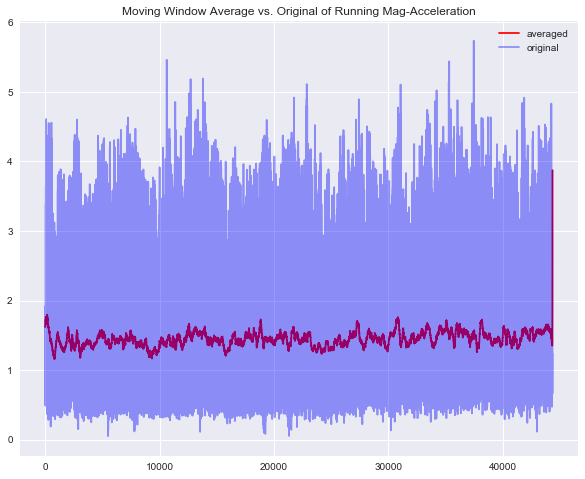

In [393]:
# Magnitude of Acceleration Moving Window Average
# Running Only

win = 250
acc_run_mag = np.sqrt(df_run_data.acceleration_x**2 + (df_run_data.acceleration_y-1)**2 + df_run_data.acceleration_z**2)
mean_run_acc_mag = (moving_window_avg(acc_run_mag, win))

threshold = 0.22
plot_moving_avg(mean_run_acc_mag, acc_run_mag, win, 'Running Mag-Acceleration');
# plt.plot(range(len(acc_mag)), [threshold]*len(acc_mag), c='k');

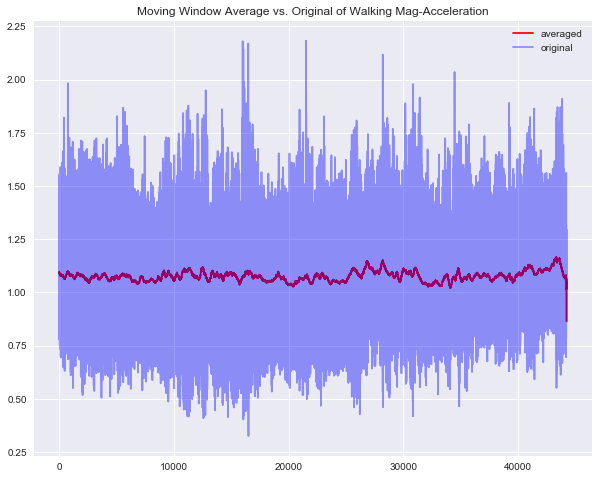

In [394]:
# Magnitude of Acceleration Moving Window Average
# Walking Only

win = 250
acc_walk_mag = np.sqrt(df_walk_data.acceleration_x**2 + (df_walk_data.acceleration_y-1)**2 + df_walk_data.acceleration_z**2)
mean_walk_acc_mag = (moving_window_avg(acc_walk_mag, win))

threshold = 0.22
plot_moving_avg(mean_walk_acc_mag, acc_walk_mag, win, 'Walking Mag-Acceleration');
# plt.plot(range(len(acc_mag)), [threshold]*len(acc_mag), c='k');

(0.9, 2.0)

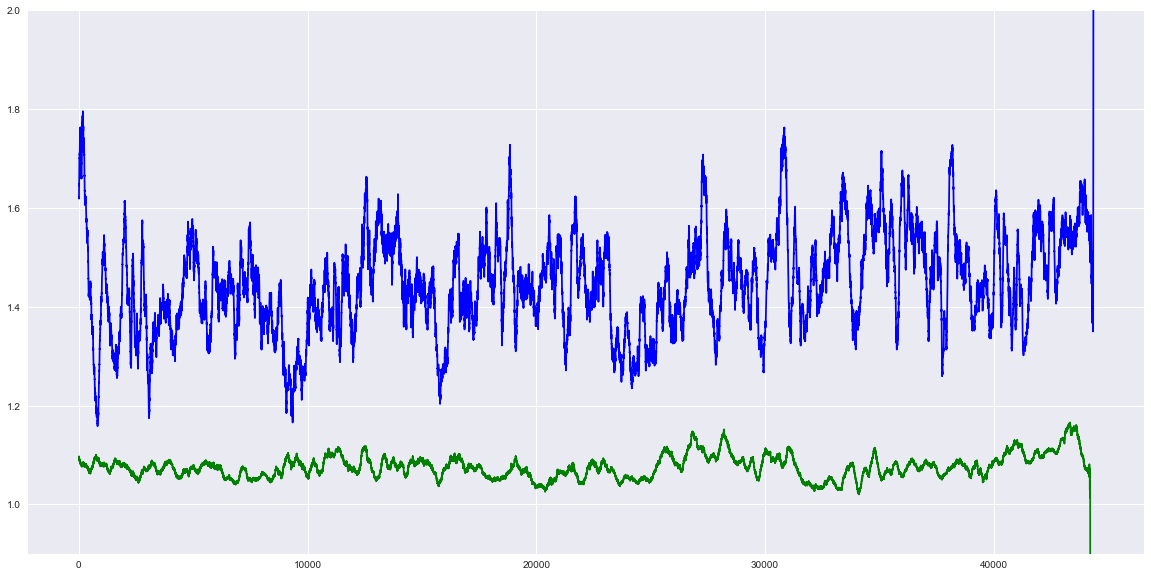

In [398]:
plt.figure(figsize=(20,10))
plt.plot(mean_walk_acc_mag, 'g')
plt.plot(mean_run_acc_mag, 'b')
plt.ylim([.90,2.0])

# Sliding Range Plotly

In [197]:
import plotly.plotly as py
import plotly.graph_objs as go 
import plotly
plotly.tools.set_credentials_file(username='badderc', api_key='4txqXlDY4Ozp3tdv66MD')


from datetime import datetime
import pandas_datareader.data as web

# df = web.DataReader("aapl", 'yahoo',
#                     datetime(2007, 10, 1),
#                     datetime(2009, 4, 1))

trace = go.Scatter(x=df.time_sec,
                   y=df.acceleration_x)

data = [trace]
layout = dict(
    title='Time series with range slider and selectors',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1d',
                     step='day',
                     stepmode='backward'),
                dict(count=6,
                     label='1m',
                     step='minute',
                     stepmode='backward'),
                dict(count=1,
                    label='3m',
                    step='minute',
                    stepmode='backward'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig)


/Users/carliebadder/anaconda/lib/python3.6/site-packages/plotly/plotly/plotly.py:219: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



The draw time for this plot will be slow for all clients.


/Users/carliebadder/anaconda/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



# Frequency Response

## X-Acc Frequency Distribution Walking vs. Running 

58.8532413685 6.76683575729
110.793578698 19.7883295976


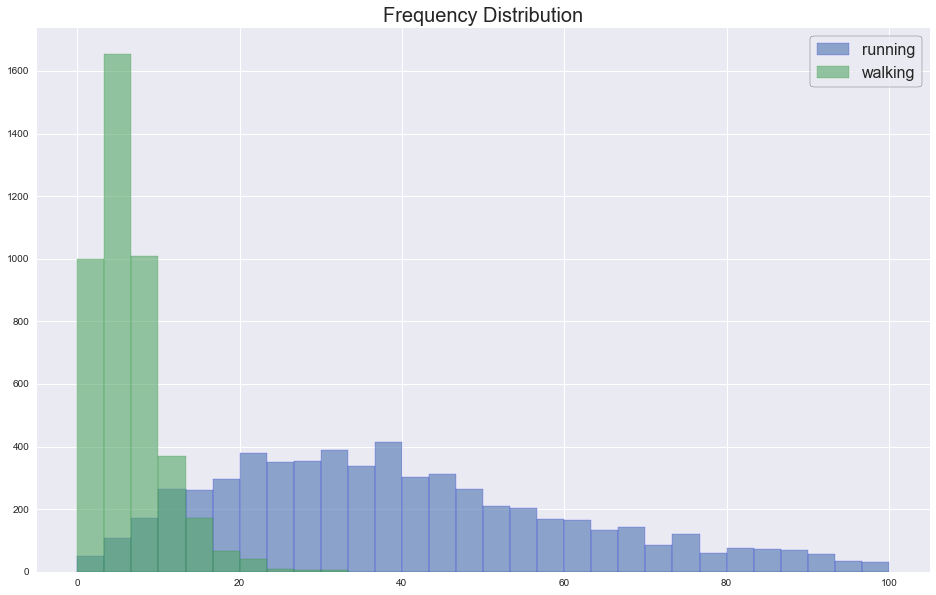

In [324]:
# Running Frequency Response
x = all_run.time_sec
y_x = all_run.acceleration_x

f_x = np.fft.fft(y_x)
freq_x = np.fft.fftfreq(len(y_x),d=x[1]-x[0])
# plt.plot(freq_x, abs(f_x)**2)
plt.figure(figsize=(16,10));
plt.hist(abs(f_x), bins=30, range=[0,100], label='running', alpha=0.6, edgecolor='b');

# Walking Frequency Response
x2 = all_walk.time_sec
y2_x = all_walk.acceleration_x

f_x2 = np.fft.fft(y2_x)
freq_x2 = np.fft.fftfreq(len(y2_x),d=x2[1]-x2[0])
plt.hist(abs(f_x2), bins=30, range=[0,100], label='walking', alpha=0.6, edgecolor='g');

plt.legend(fontsize='16', frameon=True, edgecolor='k');
plt.title('Frequency Distribution', fontsize='20');

# plt.figure()
# plt.plot(freq_x, np.abs(f_x)**2)
# plt.figure()
# plt.plot(freq_x, np.angle(f_x) )
# plt.show()
fr_run_mean = np.mean(abs(f_x))
fr_walk_mean = np.mean(abs(f_x2))
fr_run_std = np.std(abs(f_x))
fr_walk_std = np.std(abs(f_x2))
print(fr_run_mean, fr_walk_mean)
print(fr_run_std, fr_walk_std)

In [ ]:
# plt.figure()
# plt.semilogy(freq_x, abs(f_x)**2)
# plt.figure()

## Y-Acc Frequency Distribution Walking vs. Running 

30.5227736437 14.4333647255
86.2727927293 130.3917237


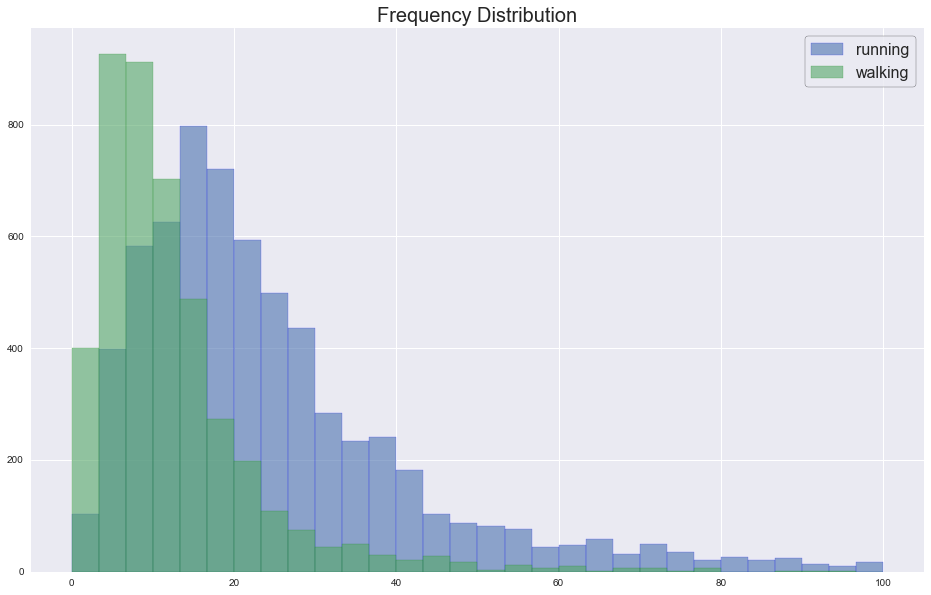

In [495]:
# Running Frequency Response
x = all_run.time_sec
y_y = all_run.acceleration_y

f_y = np.fft.fft(y_y)
freq_y = np.fft.fftfreq(len(y_y),d=x[1]-x[0])
# plt.plot(freq_x, abs(f_x)**2)
plt.figure(figsize=(16,10));
plt.hist(abs(f_y), bins=30, range=[0,100], label='running', alpha=0.6, edgecolor='b');

# Walking Frequency Response
x2 = all_walk.time_sec
y2_y = all_walk.acceleration_y

f_y2 = np.fft.fft(y2_y)
freq_y2 = np.fft.fftfreq(len(y2_y),d=x2[1]-x2[0])
plt.hist(abs(f_y2), bins=30, range=[0,100], label='walking', alpha=0.6, edgecolor='g');

plt.legend(fontsize='16', frameon=True, edgecolor='k');
plt.title('Frequency Distribution', fontsize='20');

fry_run_mean = np.mean(abs(f_y))
fry_walk_mean = np.mean(abs(f_y2))
fry_run_std = np.std(abs(f_y))
fry_walk_std = np.std(abs(f_y2))
print(fry_run_mean, fry_walk_mean)
print(fry_run_std, fry_walk_std)

## Smoothed Magnitude FFT

In [ ]:
# mean_acc_mag - smoothed magnitude of acceleration WALKING
# mean_walk_acc_mag

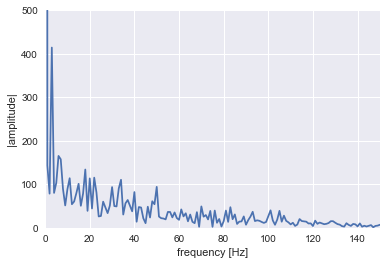

In [504]:
# Walking Frequency Response
y_m_w = mean_walk_acc_mag # [:-100]
x_m_w = range(len(y_m_w))

f_m_w = np.fft.fft(y_m_w)
freq_m_w = np.fft.fftfreq(len(y_m_w),d=x_m_w[1]-x_m_w[0])

# plt.figure(figsize=(16,10));
# plt.hist(abs(f_x), bins=30, range=[0,100], label='running', alpha=0.6, edgecolor='b');

# a.set_ylim([-r, r])

plt.figure(1)
# plt.xscale('log')
plt.xlabel('frequency [Hz]')
plt.ylabel('|amplitude|')
plt.xlim([0,150])
plt.ylim([0, 500])
plt.plot(abs(f_m_w))


[6] 1163.61373759
3 414.432780022


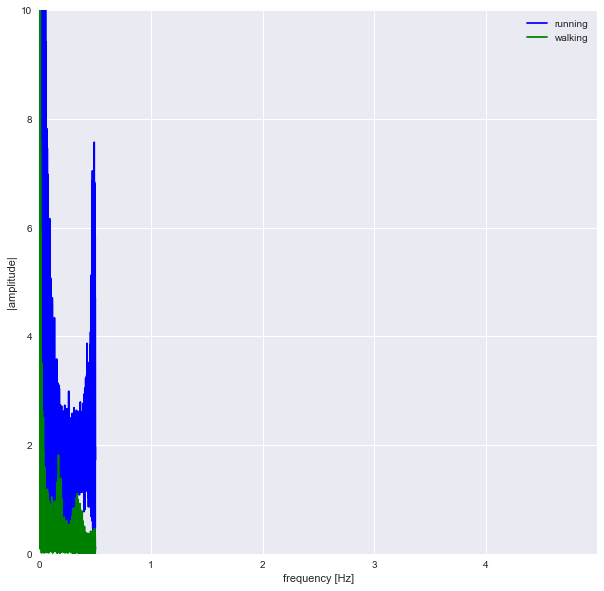

In [559]:
# Running vs. Walking Frequency Response
y_m_r = mean_run_acc_mag # [100:-100]
x_m_r = range(len(y_m_r))

f_m_r = np.fft.fft(y_m_r)
freq_m_r = np.fft.fftfreq(len(y_m_r),d=x_m_r[1]-x_m_r[0])

max_run_amp = np.max(abs(f_m_r)[4:])
r_ind,  = np.where(abs(f_m_r)[4:] == max_run_amp)
r_ind = r_ind+4
max_run_amp_freq = y_m_r[int(r_ind)+4]

max_walk_amp = np.max(abs(f_m_w)[2:])
w_ind,  = np.where(abs(f_m_w)[2:] == max_walk_amp)
w_ind=int(w_ind[-2])+2
# max_walk_amp_freq = y_m_w[int(w_ind[-1])]

plt.figure(figsize=(10,10))
# plt.xscale('log')
plt.xlabel('frequency [Hz]')
plt.ylabel('|amplitude|')
plt.xlim([0,5])
plt.xticks(np.arange(5))
plt.ylim([0, 10])
plt.plot(freq_m_r, abs(f_m_r), 'b', label='running')
plt.plot(freq_m_w, abs(f_m_w), 'g', label='walking')
plt.scatter(r_ind, max_run_amp, c='r', marker='o', s=60)
plt.scatter(w_ind, max_walk_amp, c='k', marker='o', s=60)

plt.legend();

print(r_ind, max_run_amp)
print(w_ind, max_walk_amp)

In [523]:
f_m_r[0:10]

array([  6.41684891e+04   +0.j        ,   2.60289996e+02 +830.94171296j,
        -1.98188255e+02 +710.47449298j,   3.15309348e+02 -270.53627241j,
         1.78664255e+02 +148.79365107j,   5.34209239e+01   -6.19520453j,
         3.89313340e+02+1096.55462857j,   5.21830066e+02  +83.17707438j,
         2.15686179e+02  -87.61675348j,  -2.91861372e+02 +207.96618077j])

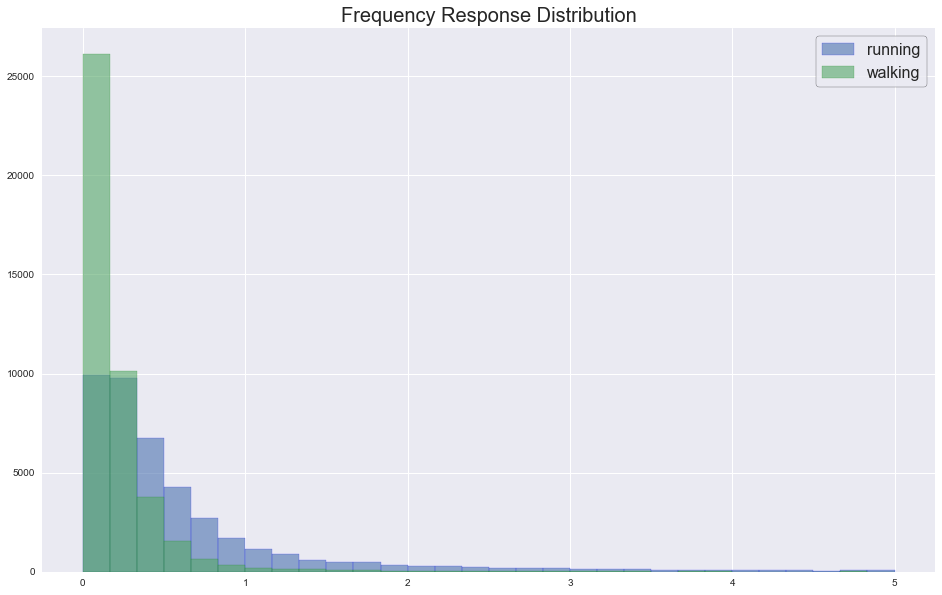

In [503]:
plt.figure(figsize=(16,10));
plt.hist(abs(f_m_r), bins=30, range=[0,5], label='running', alpha=0.6, edgecolor='b');
plt.hist(abs(f_m_w), bins=30, range=[0,5], label='walking', alpha=0.6, edgecolor='g');

plt.legend(fontsize='16', frameon=True, edgecolor='k');
plt.title('Frequency Response Distribution', fontsize='20');

## X-Acceleration Moving Window FR vs. Actual Activity

In [304]:
# fr_run_mean = np.mean(abs(f_x))
# fr_walk_mean = np.mean(abs(f_x2))
# fr_run_std = np.std(abs(f_x))
# fr_walk_std = np.std(abs(f_x2))

f_x_list = []
x = df.time_sec
y_x = df.acceleration_x
activity = df.activity
window = 800
walking = fr_walk_mean #+fr_walk_std
# mean+2*std was too much -- all walking

for i in range(len(y_x)):
    # range = i:i+window
    new_y = y_x[i:i+window]
    # mean activity for window
    act = np.mean(activity[i:i+window])
    # calculate the fft
    f_x = np.fft.fft(new_y)
    f_x_mean = np.mean(abs(f_x))
    # compare the mean fr to the mean+2std from walking fr
    if (f_x_mean) > walking:
        f_x_list.append([act, 1])
    else:
        f_x_list.append([act, 0])


In [306]:
real = [row[0] for row in f_x_list]
guess = [row[1] for row in f_x_list]

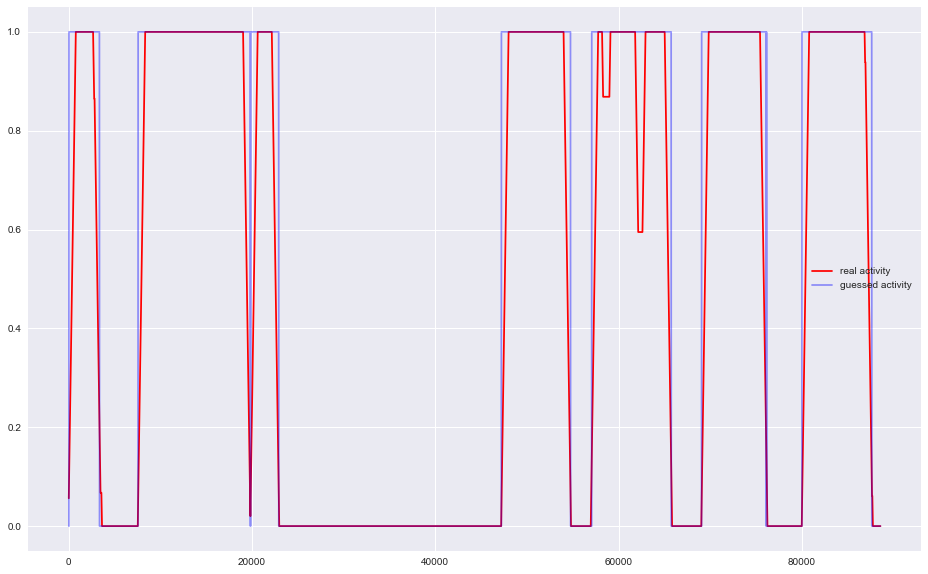

In [307]:
plt.figure(figsize=(16,10))
x = range(len(f_x_list))

plt.plot(x, real, 'r', label='real activity')
plt.plot(x, guess, 'b', label='guessed activity', alpha=0.4)
plt.legend()

## Y-Acceleration Moving Window FR vs. Actual Activity

In [496]:
f_y_list = []
x = df.time_sec
y_y = df.acceleration_y
activity = df.activity
window = 800
walking = fry_walk_mean #+fr_walk_std
# mean+2*std was too much -- all walking

for i in range(len(y_y)):
    # range = i:i+window
    new_y = y_y[i:i+window]
    
    # mean activity for window
    act = np.mean(activity[i:i+window])
    
    # calculate the fft
    f_y = np.fft.fft(new_y)
    f_y_mean = np.mean(abs(f_y))
    
    # compare the mean fr to the mean+2std from walking fr
    if (f_y_mean) > walking:
        f_y_list.append([act, 1])
    else:
        f_y_list.append([act, 0])


In [497]:
realy = [row[0] for row in f_y_list]
guessy = [row[1] for row in f_y_list]

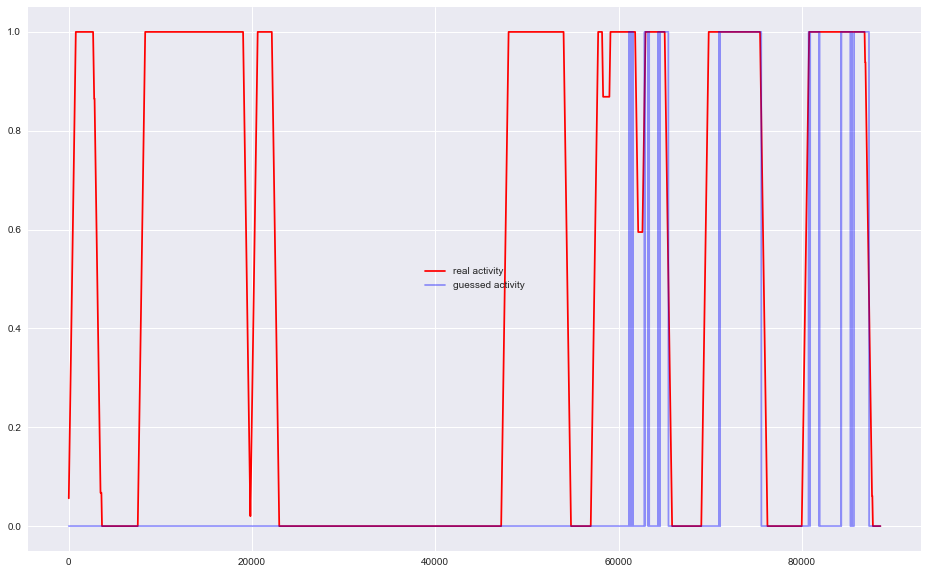

In [498]:
plt.figure(figsize=(16,10))
x = range(len(f_y_list))

plt.plot(x, realy, 'r', label='real activity')
plt.plot(x, guessy, 'b', label='guessed activity', alpha=0.4)
plt.legend()

## Magnitude of Acceleration FR vs Real Activity

138.615541512 39.5951543075
337.723494394 228.191867013


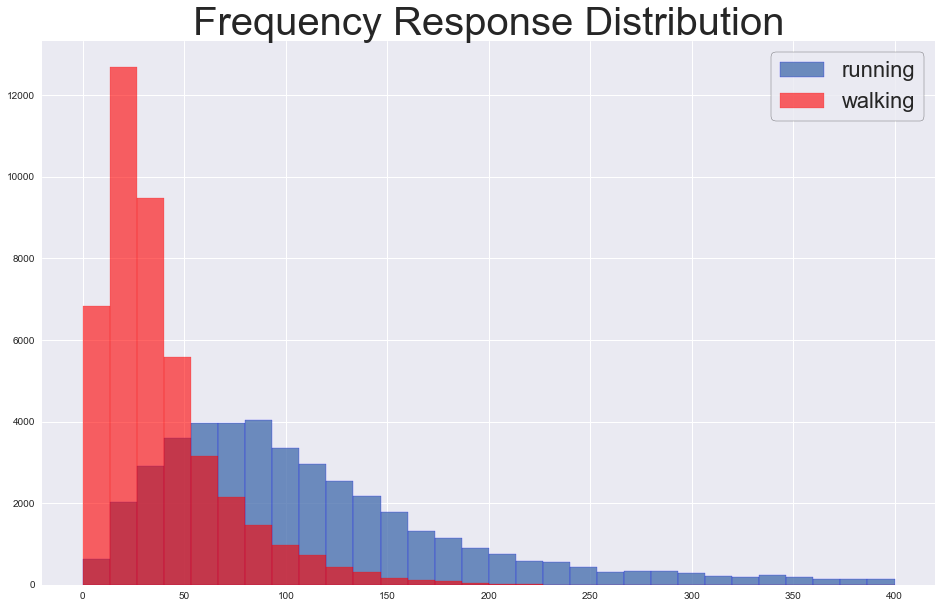

In [17]:
# Running vs Walking Frequency Response All Days
# run_time = df.time_sec
run_mag = np.sqrt(df_run_data.acceleration_x**2 + df_run_data.acceleration_y**2 + df_run_data.acceleration_z**2)
timestep = 0.2

f_run = np.fft.fft(run_mag)
freq_run = np.fft.fftfreq(f_run.shape[-1], d=timestep)

    # plot
plt.figure(figsize=(16,10));
plt.hist(abs(f_run), bins=30, range=[0,400], label='running', alpha=0.8, edgecolor='b');

# Walking Frequency Response
# walk_time = all_walk.time_sec
walk_mag = np.sqrt(df_walk_data.acceleration_x**2 + df_walk_data.acceleration_y**2 + df_walk_data.acceleration_z**2)

f_walk = np.fft.fft(walk_mag)
freq_walk = np.fft.fftfreq(f_walk.shape[-1], d=timestep)
    # plot
plt.hist(abs(f_walk), bins=30, range=[0,400], label='walking',color='r', alpha=0.6, edgecolor='r');

plt.legend(fontsize='22', frameon=True, edgecolor='k');
plt.title('Frequency Response Distribution', fontsize='40');

fr_run_mag_mean = np.mean(abs(f_run))
fr_walk_mag_mean = np.mean(abs(f_walk))
fr_run_mag_std = np.std(abs(f_run))
fr_walk_mag_std = np.std(abs(f_walk))
print(fr_run_mag_mean, fr_walk_mag_mean)
print(fr_run_mag_std, fr_walk_mag_std)

In [24]:
run_f_bins2 = list(zip(abs(f_run),freq_run ))

In [25]:
run_f_bins2 = sorted(run_f_bins2, key=lambda x: x[0], reverse=True)
# first max = 2.405 Hz at 488.081 amplitude
# second max = 1.309 Hz at 233.679 amplitude

In [26]:
walk_f_bins2 = list(zip(abs(f_walk),freq_walk ))

In [27]:
walk_f_bins2 = sorted(walk_f_bins2, key=lambda x: x[0], reverse=True)
# first max = 1.855 Hz at 105.227 amplitude
# second max = 0.945 Hz at 57.336 amplitude

In [34]:
[len(freq_walk)//2]

[22111]

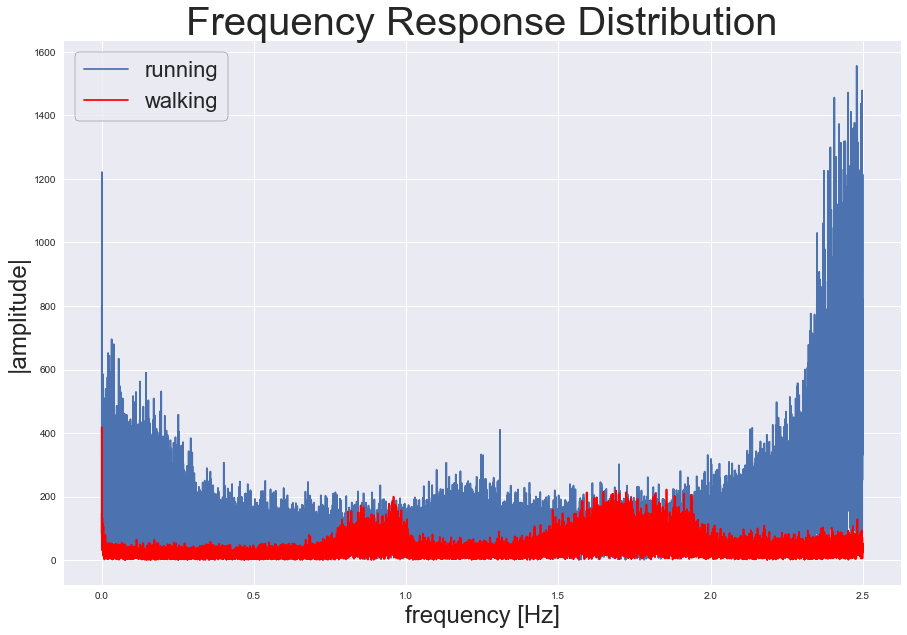

In [36]:
plt.figure(figsize=(15,10))
# plt.xscale('log')
plt.xlabel('frequency [Hz]', fontsize=24)
plt.ylabel('|amplitude|', fontsize=24)
# plt.xlim([0,])
# plt.ylim([0, 1000])
plt.plot(freq_run[1:22182], abs(f_run)[1:22182], label='running')
plt.plot(freq_walk[1:22111], abs(f_walk)[1:22111], 'r', label='walking')
plt.legend(fontsize=22, frameon=True, edgecolor='k')
plt.title('Frequency Response Distribution', fontsize=40)

### FFT By Day

In [42]:
days = set(df_run_data.date)
days = list(days)
print(days)

['2017-7-11', '2017-7-1', '2017-7-15', '2017-7-17', '2017-7-6', '2017-7-2', '2017-7-9', '2017-6-30', '2017-7-4']


In [55]:
ind = np.argmax(abs(f_run)[1:])
freq_run[ind]

2.6812748632810681

run amp 525.024310274 freq 2.59937356712
run amp 164.850081295 freq 2.42039610461
walk amp 58.5671701021 freq 1.88441982103
run amp 649.592356965 freq 2.65431865432
walk amp 38.3674777239 freq 1.95118587976
run amp 835.121224964 freq 2.69913137333
walk amp 91.097301678 freq 2.09260644043
run amp 454.259183596 freq 2.60278996826
walk amp 73.756695366 freq 1.99342083693
run amp 420.94292129 freq 2.63945452302
walk amp 15.3163587419 freq 1.9404019404
run amp 525.927568028 freq 2.68235220451
walk amp 37.5484753052 freq 0.980572409144
run amp 365.00427213 freq 2.69386070913
walk amp 43.0333786687 freq 2.1037959797
run amp 512.529788834 freq 2.68127486328
walk amp 22.2429937299 freq 0.950950950951


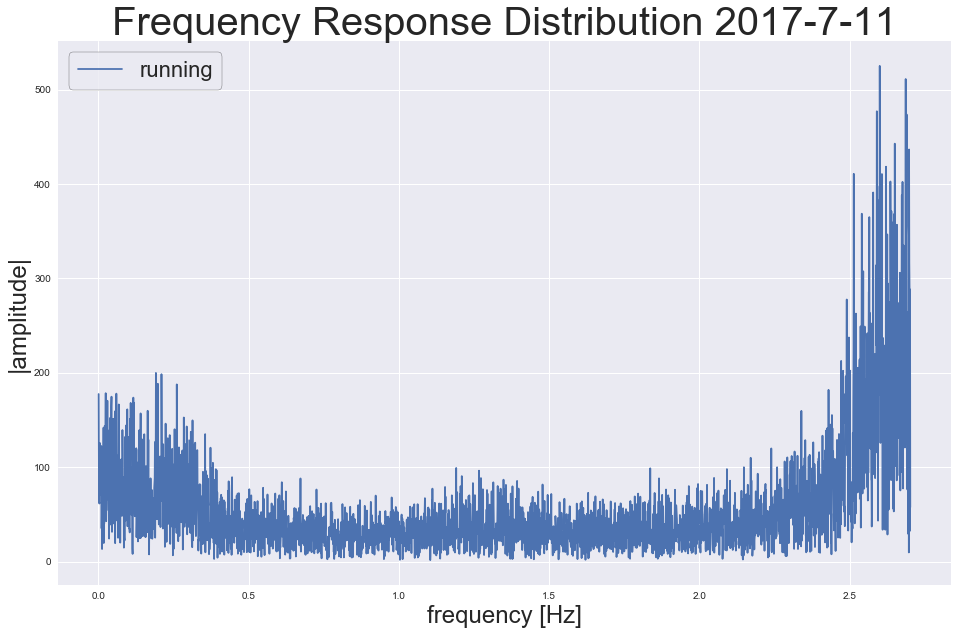

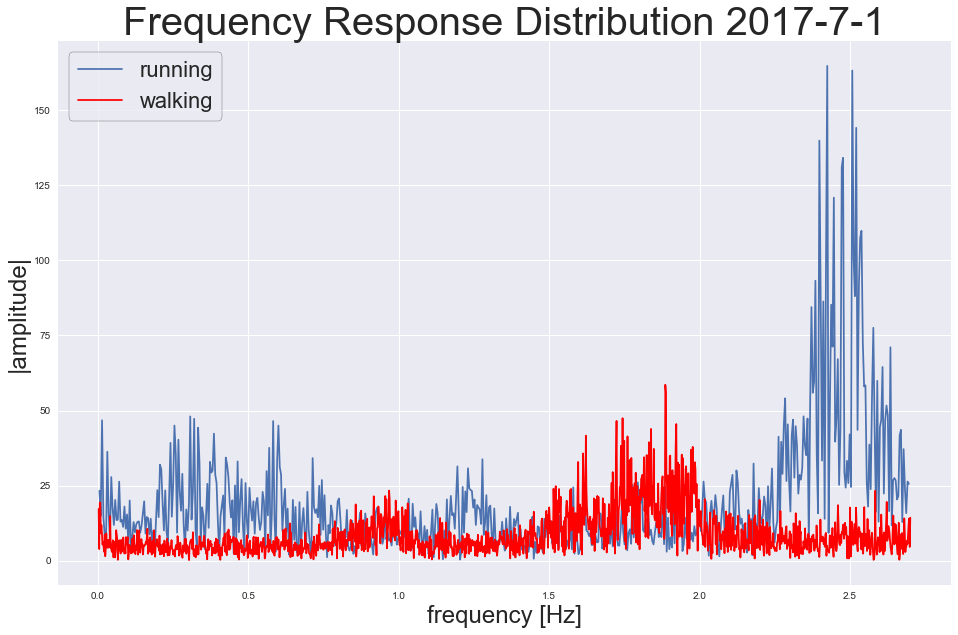

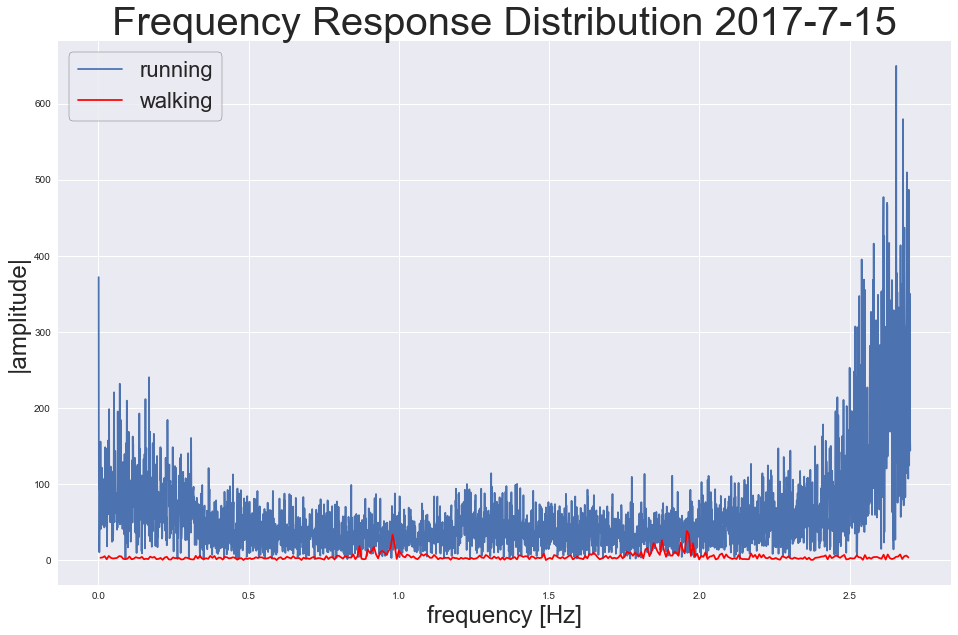

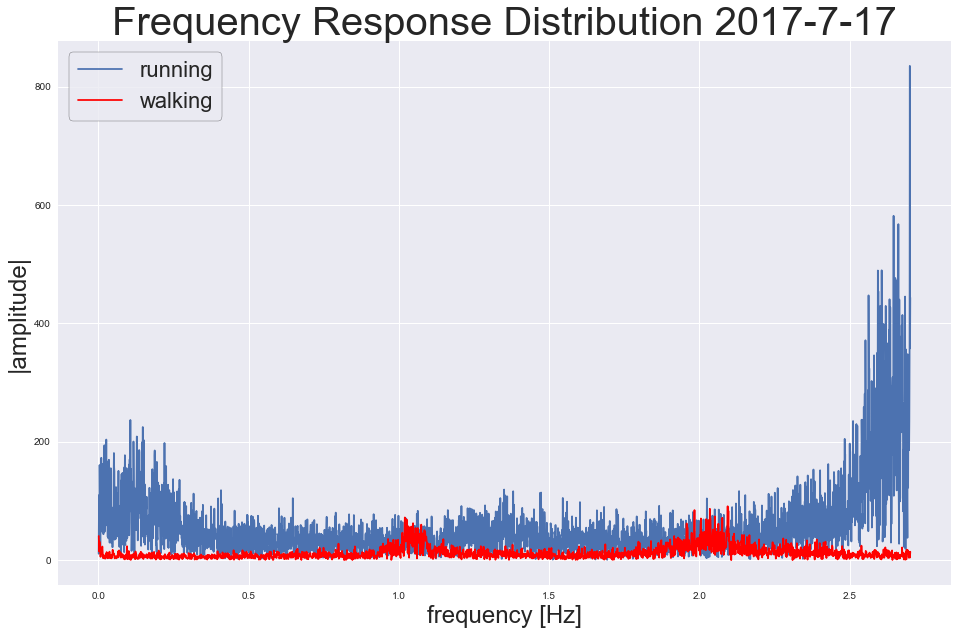

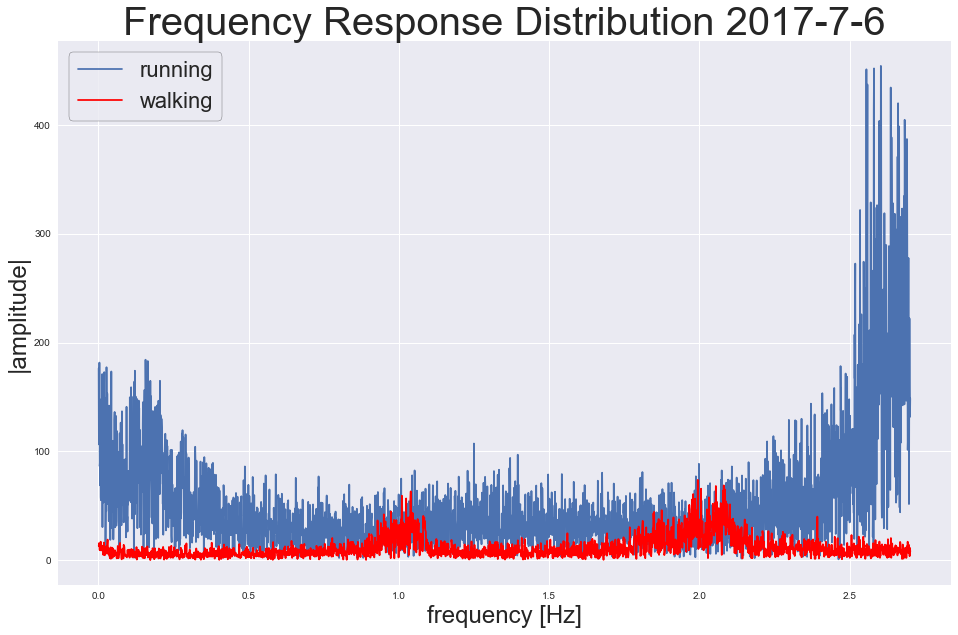

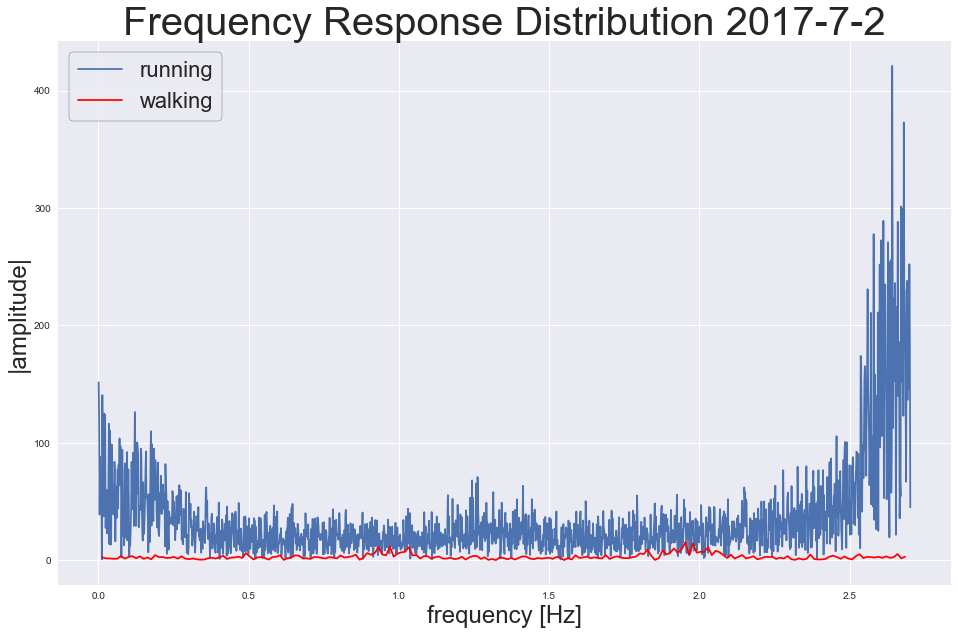

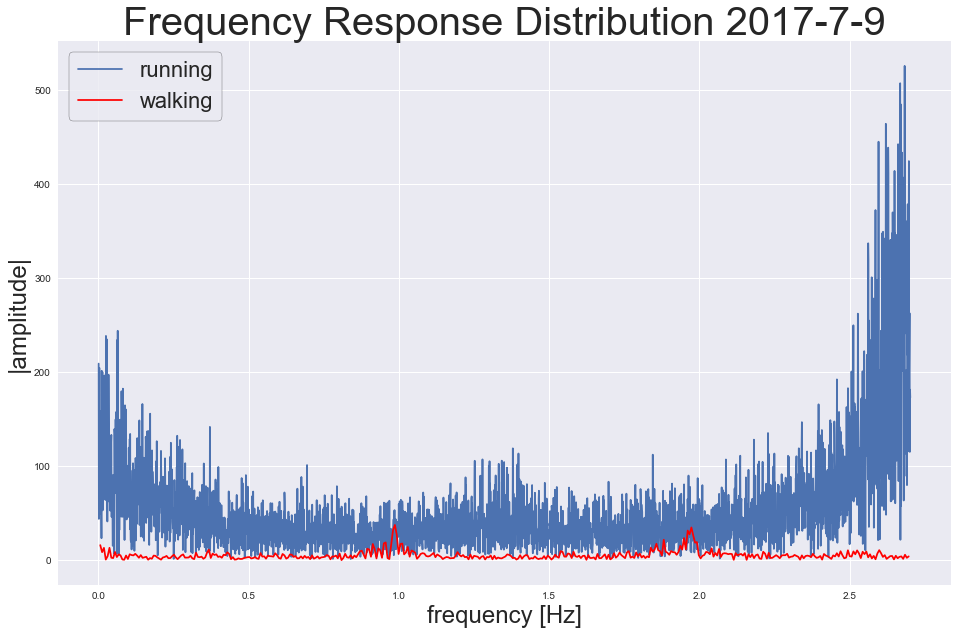

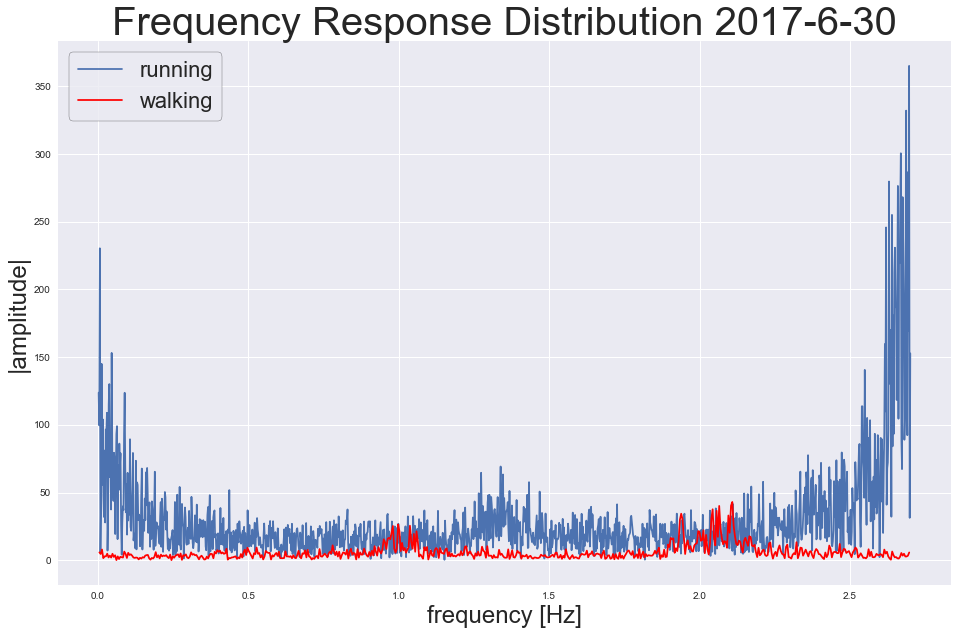

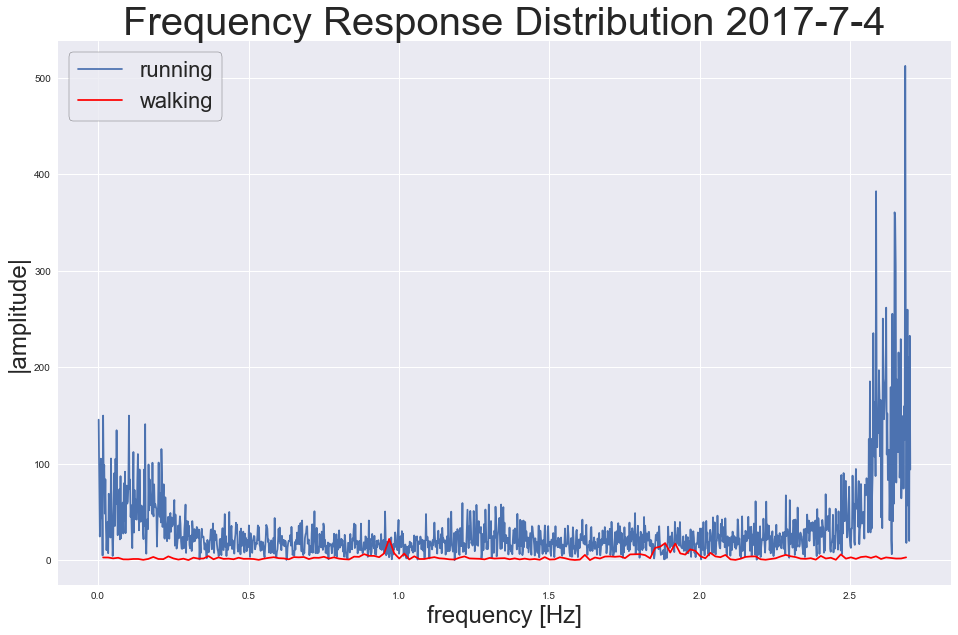

In [59]:
# Running vs Walking Frequency Response Individual Days
timestep = 0.185
run_max = []
walk_max = []

for day in days:
    
    plt.figure(figsize=(16,10));

    try:
        run_mag = df_run_data[df_run_data.date == day].acceleration_mag
        f_run = np.fft.fft(run_mag)
        freq_run = np.fft.fftfreq(f_run.shape[-1], d=timestep)
        half_r = len(freq_run)//2
#         plt.hist(abs(f_run), bins=30, range=[0,400], label='running', alpha=0.8, edgecolor='b');
        plt.plot(freq_run[1:half_r], abs(f_run)[1:half_r], label='running')
        run_max.append([freq_run[np.argmax(abs(f_run)[1:half_r])], np.max(abs(f_run)[1:half_r])])
        print('run', 'amp', np.max(abs(f_run)[1:half_r]), 'freq', freq_run[np.argmax(abs(f_run)[1:half_r])])
    
    except:
        pass
    
    try:
        walk_mag = df_walk_data[df_walk_data.date == day].acceleration_mag
        f_walk = np.fft.fft(walk_mag)
        freq_walk = np.fft.fftfreq(f_walk.shape[-1], d=timestep)
        half_w = len(freq_walk)//2
#         plt.hist(abs(f_walk), bins=30, range=[0,400], label='walking',color='r', alpha=0.6, edgecolor='r');
        plt.plot(freq_walk[1:half_w], abs(f_walk)[1:half_w], 'r', label='walking')
        walk_max.append([freq_walk[np.argmax(abs(f_walk)[1:half_w])], np.max(abs(f_walk)[1:half_w])])
        print('walk', 'amp', np.max(abs(f_walk)[1:half_w]),'freq', freq_walk[np.argmax(abs(f_walk)[1:half_w])])

    except:
        pass
    
    plt.legend(fontsize='22', frameon=True, edgecolor='k');
    plt.title('Frequency Response Distribution %s' %day, fontsize='40');
    plt.xlabel('frequency [Hz]', fontsize=24)
    plt.ylabel('|amplitude|', fontsize=24)


In [63]:
run_max_freqs = [x[0] for x in run_max]
run_max_amps = [x[1] for x in run_max]
walk_max_freqs = [x[0] for x in walk_max]
walk_max_amps = [x[1] for x in walk_max]

In [2]:
plt.figure(figsize=(10,7))
plt.scatter(run_max_freqs, run_max_amps, linewidths=5, label='running')
plt.scatter(walk_max_freqs, walk_max_amps, linewidths=5,label='walking')
plt.scatter(np.mean(walk_max_freqs), np.mean(walk_max_amps),linewidths=10, edgecolors='r', label='mean walk')
plt.scatter(np.mean(run_max_freqs), np.mean(run_max_amps),linewidths=10, edgecolors='k', label='mean run')
plt.title('Max Amps By Day: Walking vs Running', fontsize=32)
plt.legend(fontsize=22, frameon=True, edgecolor='k')
plt.xlabel('Frequency[Hz]', fontsize=22)
plt.ylabel('Amplitude', fontsize=22)

NameError: name 'plt' is not defined

### Activity Guessed by FFT

In [560]:
# Use Frequency Response to Determine Activity and Compare to Recorded Activity
f_mag_list = []
x_mag = df.time_sec
y_mag = np.sqrt(df.acceleration_x**2 + df.acceleration_y**2 + df.acceleration_z**2)

activity = df.activity
window = 800
walking = fr_walk_mag_mean

for i in range(len(y_mag)):
    # range = i:i+window
    new_y = y_mag[i:i+window]
    
    # mean activity for window
    act = np.median(activity[i:i+window])
    
    # calculate the fft
    f = np.fft.fft(new_y)
    f_mean = np.mean(abs(f))
    
    # compare the mean fr to the mean+2std from walking fr
    if (f_mean) > walking:
        f_mag_list.append([act, 1])
    else:
        f_mag_list.append([act, 0])


In [561]:
real_mag = [row[0] for row in f_mag_list]
guess_mag = [row[1] for row in f_mag_list]

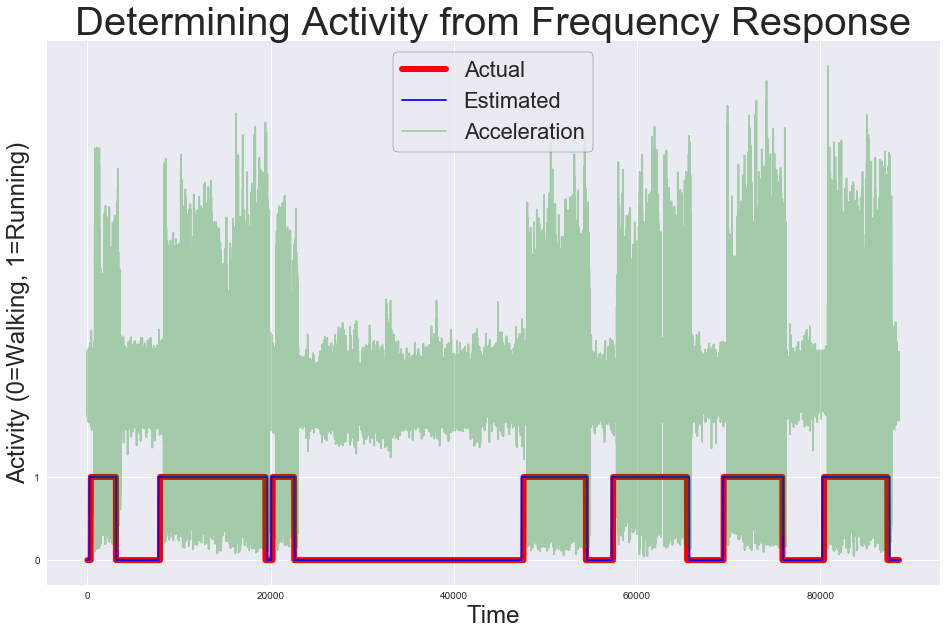

In [860]:
plt.figure(figsize=(16,10))
x = range(len(f_mag_list))

plt.plot(x, real_mag, 'r', label='Actual', linewidth=6.0)
plt.plot(x, guess_mag, 'b', label='Estimated')
plt.plot(x, y_mag, 'g', label='Acceleration', alpha=0.3)
plt.legend(fontsize=22, frameon=True, edgecolor='k')
plt.xlabel('Time', fontsize=24)
plt.ylabel('Activity (0=Walking, 1=Running)', fontsize=24)
plt.yticks([0,1])
plt.title('Determining Activity from Frequency Response', fontsize=40)

# Plots

In [ ]:
# Potential arrays and DFs:
real_mag
guess_mag
run_mag
walk_mag
f_run, run_f_bins, f_walk, walk_f_bins
all_run df
all_walk df
df_run_data
df_walk_data
mean_walk_acc_mag
mean_run_acc_mag - smoothed mag of acc
mean_acc_mag - total accel smoothed mag

dm_acc_mag
dm_acc_x,y,z
dm_walk_acc_x,y,z
dm_run_acc_x,y,z -- metrics for total acc and for w/r
dm_run_mag
dm_walk_mag
dm_run_mag_800
dm_walk_mag_800 
all_metrics = ['mn', 'std','med','ma','mi','ent','mad']

In [932]:
# Running Frequency Response
run_mag2 = np.sqrt(df_run_data.acceleration_x**2 + df_run_data.acceleration_y**2 + df_run_data.acceleration_z**2)
walk_mag2 = np.sqrt(df_walk_data.acceleration_x**2 + df_walk_data.acceleration_y**2 + df_walk_data.acceleration_z**2)
timestep = 0.2

f_run2 = np.fft.fft(run_mag2)
freq_run2 = np.fft.fftfreq(f_run2.shape[-1], d=timestep)

f_walk2 = np.fft.fft(walk_mag2)
freq_walk2 = np.fft.fftfreq(f_walk2.shape[-1], d=timestep)

In [934]:
df_run_data['fft'] = f_run2
df_run_data['fft_bins'] = freq_run2
df_walk_data['fft'] = f_walk2
df_walk_data['fft_bins'] = freq_walk2

/Users/carliebadder/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/carliebadder/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/carliebadder/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

In [937]:
df_walk_data['abs_freq'] = abs(f_walk2)
df_run_data['abs_freq'] = abs(f_run2)

/Users/carliebadder/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/carliebadder/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [942]:
# df_walk_data['acc_x_mean'] = dm_walk_acc_x['mn']
# df_walk_data['acc_x_min'] = dm_walk_acc_x['mi']
# df_walk_data['acc_x_max'] = dm_walk_acc_x['ma']
# df_walk_data['acc_x_med'] = dm_walk_acc_x['med']
# df_walk_data['acc_x_mad'] = dm_walk_acc_x['mad']
# df_walk_data['acc_x_ent'] = dm_walk_acc_x['ent']
# df_walk_data['acc_x_std'] = dm_walk_acc_x['std']
# df_walk_data['acc_y_mean'] = dm_walk_acc_y['mn']
# df_walk_data['acc_y_min'] = dm_walk_acc_y['mi']
# df_walk_data['acc_y_max'] = dm_walk_acc_y['ma']
# df_walk_data['acc_y_med'] = dm_walk_acc_y['med']
# df_walk_data['acc_y_mad'] = dm_walk_acc_y['mad']
# df_walk_data['acc_y_ent'] = dm_walk_acc_y['ent']
# df_walk_data['acc_y_std'] = dm_walk_acc_y['std']
# df_walk_data['acc_z_mean'] = dm_walk_acc_z['mn']
# df_walk_data['acc_z_min'] = dm_walk_acc_z['mi']
# df_walk_data['acc_z_max'] = dm_walk_acc_z['ma']
# df_walk_data['acc_z_med'] = dm_walk_acc_z['med']
# df_walk_data['acc_z_mad'] = dm_walk_acc_z['mad']
# df_walk_data['acc_z_ent'] = dm_walk_acc_z['ent']
# df_walk_data['acc_z_std'] = dm_walk_acc_z['std']
df_walk_data['acc_mag_mean'] = dm_walk_mag2['mn']
df_walk_data['acc_mag_min'] = dm_walk_mag2['mi']
df_walk_data['acc_mag_max'] = dm_walk_mag2['ma']
df_walk_data['acc_mag_med'] = dm_walk_mag2['med']
df_walk_data['acc_mag_mad'] = dm_walk_mag2['mad']
df_walk_data['acc_mag_ent'] = dm_walk_mag2['ent']
df_walk_data['acc_mag_std'] = dm_walk_mag2['std']

/Users/carliebadder/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/carliebadder/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/carliebadder/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [943]:
df_run_data['acc_x_mean'] = dm_run_acc_x['mn']
df_run_data['acc_x_min'] = dm_run_acc_x['mi']
df_run_data['acc_x_max'] = dm_run_acc_x['ma']
df_run_data['acc_x_med'] = dm_run_acc_x['med']
df_run_data['acc_x_mad'] = dm_run_acc_x['mad']
df_run_data['acc_x_ent'] = dm_run_acc_x['ent']
df_run_data['acc_x_std'] = dm_run_acc_x['std']
df_run_data['acc_y_mean'] = dm_run_acc_y['mn']
df_run_data['acc_y_min'] = dm_run_acc_y['mi']
df_run_data['acc_y_max'] = dm_run_acc_y['ma']
df_run_data['acc_y_med'] = dm_run_acc_y['med']
df_run_data['acc_y_mad'] = dm_run_acc_y['mad']
df_run_data['acc_y_ent'] = dm_run_acc_y['ent']
df_run_data['acc_y_std'] = dm_run_acc_y['std']
df_run_data['acc_z_mean'] = dm_run_acc_z['mn']
df_run_data['acc_z_min'] = dm_run_acc_z['mi']
df_run_data['acc_z_max'] = dm_run_acc_z['ma']
df_run_data['acc_z_med'] = dm_run_acc_z['med']
df_run_data['acc_z_mad'] = dm_run_acc_z['mad']
df_run_data['acc_z_ent'] = dm_run_acc_z['ent']
df_run_data['acc_z_std'] = dm_run_acc_z['std']
df_run_data['acc_mag_mean'] = dm_run_mag2['mn']
df_run_data['acc_mag_min'] = dm_run_mag2['mi']
df_run_data['acc_mag_max'] = dm_run_mag2['ma']
df_run_data['acc_mag_med'] = dm_run_mag2['med']
df_run_data['acc_mag_mad'] = dm_run_mag2['mad']
df_run_data['acc_mag_ent'] = dm_run_mag2['ent']
df_run_data['acc_mag_std'] = dm_run_mag2['std']

/Users/carliebadder/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/carliebadder/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/carliebadder/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

/Users/carliebadder/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/carliebadder/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/carliebadder/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [944]:
df_run_data.to_csv('df_run_data.csv')
df_walk_data.to_csv('df_walk_data.csv')

In [946]:
df_run_data['act'] = ['run']*len(df_run_data)
df_walk_data['act'] = ['walk']*len(df_walk_data)
frames = [df_run_data, df_walk_data]
df_rw_data = pd.DataFrame()
df_rw_data = pd.concat(frames) 

/Users/carliebadder/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/carliebadder/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [950]:
df_rw_data.to_csv('df_rw_data_stacked.csv')

## Plotly Histograms

In [789]:
# bs_run_min = (max(dm_run_mag_800['mi']) - min(dm_run_mag_800['mi']))/30
# bs_run_mean = (max(dm_run_mag_800['mn']) - min(dm_run_mag_800['mn']))/30
# bs_walk_min = (max(dm_walk_mag_800['mi']) - min(dm_walk_mag_800['mi']))/30
# bs_walk_mean = (max(dm_walk_mag_800['mn']) - min(dm_walk_mag_800['mn']))/30
# # bs_run_min = (max(dm_run_mag_800['mi']) - min(dm_run_mag_800['mi']))/30
# # bs_run_min = (max(dm_run_mag_800['mi']) - min(dm_run_mag_800['mi']))/30

# order of metrics: run, walk: mean, min, max, med, mad, std, ent
bin_list_sqrt = []
mets = ['mn','mi','ma','med','mad','std','ent']
for m in mets:
#     bs_run_temp = (max(dm_run_mag_800[m]) - min(dm_run_mag_800[m]))/30
#     bs_walk_temp = (max(dm_walk_mag_800[m]) - min(dm_run_mag_800[m]))/30

    bs_run_temp = np.sqrt(len(dm_run_mag_800[m]))
    bs_walk_temp = np.sqrt(len(dm_walk_mag_800[m]))

    bin_list_sqrt.extend([bs_run_temp, bs_walk_temp])

In [800]:
bin_list = (bin_list[:-2])

In [802]:
import plotly.plotly as py
import plotly.figure_factory as ff

import numpy as np

# Group data together
hist_data = [dm_run_mag_800['mn'], dm_walk_mag_800['mn'], 
             dm_run_mag_800['mi'], dm_walk_mag_800['mi'],
            dm_run_mag_800['ma'], dm_walk_mag_800['ma'],
            dm_run_mag_800['med'], dm_walk_mag_800['med'],
            dm_run_mag_800['mad'], dm_walk_mag_800['mad'],
            dm_run_mag_800['std'], dm_walk_mag_800['std']]

group_labels = ['Run Mean', 'Walk Mean', 
                'Run Min', 'Walk Min',
               'Run Max', 'Walk Max',
               'Run Med', 'Walk Med',
               'Run MAD', 'Walk MAD',
               'Run Std', 'Walk Std']

bins = bin_list

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=bins, show_rug=False, show_hist=False)

# Plot!
py.iplot(fig, filename='Distplot')

In [803]:
ff.create_distplot?

In [759]:
import plotly.plotly as py
import plotly.graph_objs as go 

from datetime import datetime

run_mean = ff.create_distplot([dm_run_mag_800['mn']], ['Run Mean'], bin_size=.1)

run_max = ff.create_distplot([dm_run_mag_800['ma']], ['Run Max'], bin_size=.1, show_hist=False)

run_min = ff.create_distplot([dm_run_mag_800['mi']], ['Run Min'], bin_size=.1, show_hist=False)

run_med = ff.create_distplot([dm_run_mag_800['med']], ['Run Median'], bin_size=.1, show_hist=False)

run_mad = ff.create_distplot([dm_run_mag_800['mad']], ['Run MAD'], bin_size=.1, show_hist=False)

run_std = ff.create_distplot([dm_run_mag_800['std']], ['Run Std'], bin_size=.1, show_hist=False)

run_ent = ff.create_distplot([dm_run_mag_800['ent']], ['Run Entropy'], bin_size=.1, show_hist=False)

walk_mean = ff.create_distplot([dm_walk_mag_800['mn']], ['Walk Mean'], bin_size=.1)

walk_max = ff.create_distplot([dm_walk_mag_800['ma']], ['Walk Max'], bin_size=.1, show_hist=False)

walk_min = ff.create_distplot([dm_walk_mag_800['mi']], ['Walk Min'], bin_size=.1, show_hist=False)

walk_med = ff.create_distplot([dm_walk_mag_800['med']], ['Walk Median'], bin_size=.1, show_hist=False)

walk_mad = ff.create_distplot([dm_walk_mag_800['mad']], ['Walk MAD'], bin_size=.1, show_hist=False)

walk_std = ff.create_distplot([dm_walk_mag_800['std']], ['Walk Std'], bin_size=.1, show_hist=False)

walk_ent = ff.create_distplot([dm_walk_mag_800['ent']], ['Walk Entropy'], bin_size=.1, show_hist=False)

high_annotations=[dict(x='2016-03-01',
                       y=np.mean(dm_run_mag_800['mn']),
                       xref='x', yref='y',
                       text='High Average:<br>'+str(np.mean(dm_run_mag_800['mn'])),
                       ax=0, ay=-40),
                  dict(x=np.max(dm_run_mag_800['mn']),
                       y=np.min(dm_run_mag_800['mn']),
                       xref='x', yref='y',
                       text='High Max:<br>'+str(np.mean(dm_run_mag_800['mn'])),
                       ax=0, ay=-40)]
low_annotations=[dict(x='2015-05-01',
                      y=np.mean(dm_run_mag_800['mn']),
                      xref='x', yref='y',
                      text='Low Average:<br>'+str(np.mean(dm_run_mag_800['mn'])),
                      ax=0, ay=40),
                 dict(x=np.max(dm_run_mag_800['mn']),
                      y=np.min(dm_run_mag_800['mn']),
                      xref='x', yref='y',
                      text='Low Min:<br>'+str(np.mean(dm_run_mag_800['mn'])),
                      ax=0, ay=40)]

data = [run_mean, run_max, run_min, run_med, run_mad, run_std, run_ent,
        walk_mean, walk_max, walk_min, walk_med, walk_mad, walk_std, walk_ent]

updatemenus = list([
    dict(active=-1,
         buttons=list([   
            dict(label = 'Mean',
                 method = 'update',
                 args = [{'visible': [True, False, False, False, False, False, False,
                                    True, False, False, False, False, False, False]},
                         {'title': 'Yahoo High',
                          'annotations': high_annotations}]),
            dict(label = 'Maximum',
                 method = 'update',
                 args = [{'visible': [False, True, False, False, False, False, False,
                                    False, True, False, False, False, False, False]},
                         {'title': 'Yahoo Low',
                          'annotations': low_annotations}]),
            dict(label = 'Minimum',
                 method = 'update',
                 args = [{'visible': [False, False, True, False, False, False, False,
                                    False, False, True, False, False, False, False]},
                         {'title': 'Yahoo',
                          'annotations': high_annotations+low_annotations}]),
            dict(label = 'Median',
                 method = 'update',
                 args = [{'visible': [False, False, False, True, False, False, False,
                                    False, False, False, True, False, False, False]},
                         {'title': 'Yahoo',
                          'annotations': []}]),
             dict(label = 'StandardDev',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, True, False,
                                    False, False, False, False, False, True, False]},
                         {'title': 'Yahoo',
                          'annotations': []}]),
             dict(label = 'Entropy',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, True,
                                    False, False, False, False, False, False, True]},
                         {'title': 'Yahoo',
                          'annotations': []}]),
             dict(label = 'MedianAbsoluteDev',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, True, False, False,
                                    False, False, False, False, True, False, False]},
                         {'title': 'Yahoo',
                          'annotations': []}])
             
        ]),
    )
])

layout = dict(title='Run or Walk', showlegend=False,
              updatemenus=updatemenus)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='update_dropdown')

PlotlyError: Invalid 'figure_or_data' argument. Plotly will not be able to properly parse the resulting JSON. If you want to send this 'figure_or_data' to Plotly anyway (not recommended), you can set 'validate=False' as a plot option.
Here's why you're seeing this error:

'data' is not allowed in 'scatter'

Path To Error: ['data'][0]['data']

Valid attributes for 'scatter' at path ['data'][0] under parents ['figure', 'data']:

    ['cliponaxis', 'connectgaps', 'customdata', 'customdatasrc', 'dx',
    'dy', 'error_x', 'error_y', 'fill', 'fillcolor', 'hoverinfo',
    'hoverinfosrc', 'hoverlabel', 'hoveron', 'hovertext', 'hovertextsrc',
    'ids', 'idssrc', 'legendgroup', 'line', 'marker', 'mode', 'name',
    'opacity', 'r', 'rsrc', 'showlegend', 'stream', 't', 'text',
    'textfont', 'textposition', 'textpositionsrc', 'textsrc', 'tsrc',
    'type', 'uid', 'visible', 'x', 'x0', 'xaxis', 'xcalendar', 'xsrc', 'y',
    'y0', 'yaxis', 'ycalendar', 'ysrc']

Run `<scatter-object>.help('attribute')` on any of the above.
'<scatter-object>' is the object at ['data'][0]

In [753]:
ff.create_distplot?

## Run vs. Walk Metric Histograms and Real vs. Guess Activity by Metrics

In [695]:
dm_acc_mag.keys(), dm_walk_mag.keys(), dm_run_mag.keys()

(dict_keys(['mn', 'std', 'med', 'ma', 'mi', 'ent', 'mad']),
 dict_keys(['mn', 'std', 'med', 'ma', 'mi', 'ent', 'mad']),
 dict_keys(['mn', 'std', 'med', 'ma', 'mi', 'ent', 'mad']))

In [719]:
# dm_walk_mag_df = pd.DataFrame()
# dm_run_mag_df = pd.DataFrame()
dm_run_walk_mag_df = pd.DataFrame()

In [740]:
dm_walk_mag_df['activity'] = ['walk']*len(dm_walk_mag_df)
dm_run_mag_df['activity'] = ['run']*len(dm_run_mag_df)

In [741]:
# dm_walk_mag_df = dm_walk_mag_df.from_dict(dm_walk_mag_800)
# dm_run_mag_df = dm_run_mag_df.from_dict(dm_run_mag_800)

frames = [dm_walk_mag_df, dm_run_mag_df]

dm_run_walk_mag_df = pd.concat(frames)

In [743]:
# dm_run_mag_df.to_csv('dm_run_mag_df.csv')
# dm_walk_mag_df.to_csv('dm_walk_mag_df.csv')
dm_run_walk_mag_df.to_csv('dm_run_walk_mag_df.csv')

In [736]:
guess_activity_list = []
time = df.time_sec
acc_mag = df.acceleration_mag
real_activity = df.activity

window = 1000
length = len(acc_mag)-window
walking = np.mean(dm_walk_mag_800['mn']) # + np.std(dm_walk_mag_800['mi'])

for i in range(length):
    # range = i:i+window
    new_y = acc_mag[i:i+window]
    
    # median activity for window
    act = np.median(real_activity[i:i+window])
    
    # calculate the mean
    y_mean = np.mean(new_y)
    
    # compare the mean fr to the mean+2std from walking fr
    if (y_mean) < walking:
        guess_activity_list.append([act, 1])
    else:
        guess_activity_list.append([act, 0])


In [737]:
real_act_mean = [row[0] for row in guess_activity_list]
guess_act_mean = [row[1] for row in guess_activity_list]

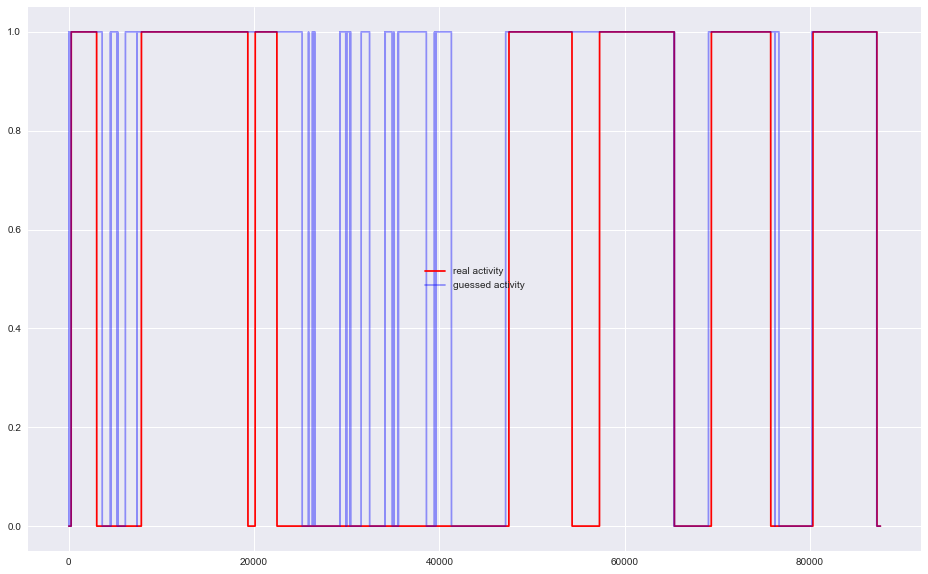

In [738]:
plt.figure(figsize=(16,10))
x = range(len(guess_activity_list))

plt.plot(x, real_act_mean, 'r', label='real activity')
plt.plot(x, guess_act_mean, 'b', label='guessed activity', alpha=0.4)
plt.legend()

## Moving Window Metric and Real vs Guess Activity (movie bokeh)

In [682]:
# moving window average I made
metric_funcs = {'mean': np.mean, 'max': np.max, 'min': np.min,
               'std': np.std, 'ent': stats.entropy, 'med': np.median,
               'mad': robust.mad}
metric_names = ['mean', 'max','min','std','ent','med','mad']

def moving_window(series, win, met):
    metric = met #ric_funcs[met]
    metric_list = []
    length = len(series) - win
    window = win
    overlap = window//2
    for i in range(0, length, overlap):
        metric_list.append(metric(series[i:i+window]))
    return metric_list

In [683]:
df_metrics_plot = pd.DataFrame(columns=['time', 'metric_code', 'activity', 
                                        'acceleration_x', 'acceleration_y', 
                                        'acceleration_z', 'acceleration_mag'])

df_metrics_plot.head()

,time,metric_code,activity,acceleration_x,acceleration_y,acceleration_z,acceleration_mag


In [684]:
# activity, acceleration_x, acceleration_y, acceleration_z, acceleration_mag
win = 800
for metric in metric_names:
    met = metric_funcs[metric]
    
    temp_acc_x = moving_window(df.acceleration_x, win, met)
    temp_acc_y = moving_window(df.acceleration_y, win, met)
    temp_acc_z = moving_window(df.acceleration_z, win, met)
    temp_acc_mag = moving_window(df.acceleration_mag, win, met)
    temp_time = range(len(temp_acc_x))
    temp_met = [metric]*len(temp_acc_x)
    temp_act = moving_window(df.activity, win, np.median)

    df_temp = pd.DataFrame(columns=['time', 'metric_code', 'activity', 
                                        'acceleration_x', 'acceleration_y', 
                                        'acceleration_z', 'acceleration_mag'])
    df_temp['time'] = temp_time
    df_temp['metric_code'] = temp_met
    df_temp['activity'] = temp_act
    df_temp['acceleration_x'] = temp_acc_x
    df_temp['acceleration_y'] = temp_acc_y
    df_temp['acceleration_z'] = temp_acc_z
    df_temp['acceleration_mag'] = temp_acc_mag

    df_metrics_plot = df_metrics_plot.append(df_temp)
        

In [686]:
df_metrics_plot.to_csv('df_metrics_plot.csv', index_label='index')

In [688]:
df_metrics_plot[df_metrics_plot.metric_code=='mean'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 0 to 219
Data columns (total 7 columns):
time                220 non-null object
metric_code         220 non-null object
activity            220 non-null float64
acceleration_x      220 non-null float64
acceleration_y      220 non-null float64
acceleration_z      220 non-null float64
acceleration_mag    220 non-null float64
dtypes: float64(5), object(2)
memory usage: 13.8+ KB


In [ ]:
# Use Frequency Response to Determine Activity and Compare to Recorded Activity
##
# fr_run_mag_mean = np.mean(abs(f_run))
# fr_walk_mag_mean = np.mean(abs(f_walk))
# fr_run_mag_std = np.std(abs(f_run))
# fr_walk_mag_std = np.std(abs(f_walk))

f_mag_list = []
x_mag = df.time_sec
y_mag = np.sqrt(df.acceleration_x**2 + df.acceleration_y**2 + df.acceleration_z**2)

activity = df.activity
window = 800
walking = fr_walk_mag_mean

for i in range(len(y_mag)):
    # range = i:i+window
    new_y = y_mag[i:i+window]
    
    # mean activity for window
    act = np.median(activity[i:i+window])
    
    # calculate the fft
    f = np.fft.fft(new_y)
    f_mean = np.mean(abs(f))
    
    # compare the mean fr to the mean+2std from walking fr
    if (f_mean) > walking:
        f_mag_list.append([act, 1])
    else:
        f_mag_list.append([act, 0])

        
real_mag = [row[0] for row in f_mag_list]
guess_mag = [row[1] for row in f_mag_list]

* The options for y-axis:
    * metrics: mean, max, min, std, entropy, median, mad, fft
* The options for x-axis:
    * magnitude of total acceleration, magnitude of individual accelerations (x,y,z), total acc, inidividual acc (x,y,z)
* min reveiws --> window size
* 

In [589]:
movie_df_all = df[['activity', 'acceleration_x', 'acceleration_y', 'acceleration_z', 'acceleration_mag']]

In [593]:
df_run_data['acceleration_mag'] = np.sqrt(df_run_data.acceleration_x**2 + df_run_data.acceleration_y**2 + df_run_data.acceleration_z**2)

/Users/carliebadder/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [595]:
movie_df_run = df_run_data[['activity', 'acceleration_x', 'acceleration_y', 'acceleration_z', 'acceleration_mag']]

In [597]:
df_walk_data['acceleration_mag'] = np.sqrt(df_walk_data.acceleration_x**2 + df_walk_data.acceleration_y**2 + df_walk_data.acceleration_z**2)

/Users/carliebadder/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [598]:
movie_df_walk = df_walk_data[['activity', 'acceleration_x', 'acceleration_y', 'acceleration_z', 'acceleration_mag']]

In [601]:
movie_df_all.to_csv('movie_df_all.csv')
movie_df_run.to_csv('movie_df_run.csv')
movie_df_walk.to_csv('movie_df_walk.csv')

## Other potential plots

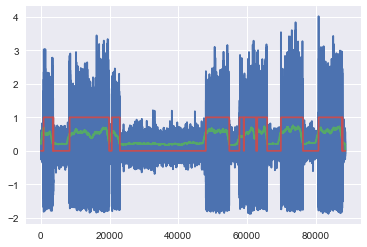

In [572]:
plt.plot(y_mag-np.mean(y_mag))
plt.plot(mean_acc_mag-np.min(mean_acc_mag))
plt.plot(df.activity)

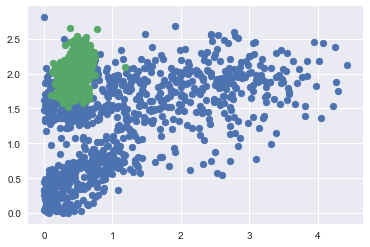

In [584]:
plt.scatter(df_run_data.acceleration_x[0:1000], df_run_data.acceleration_y[0:1000])
plt.scatter(df_walk_data.acceleration_x[0:1000], df_walk_data.acceleration_y[0:1000])